In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
  
pd.set_option('display.max_rows', 15)
np.random.seed(5)

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')
batter = pd.read_csv('/content/drive/MyDrive/Diss/Code/CSV/batter_for_clustering.csv')

Mounted at /content/drive


In [3]:
batter

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank
0,RG Sharma,INDIA,32.48,139.55,0.189,3.829,0.128,10.350,0.291,45.326,Best
1,MJ Guptill,NZ,32.66,136.71,0.187,4.185,0.065,10.750,0.222,44.649,Best
2,V Kohli,INDIA,51.50,137.67,0.163,4.382,0.281,17.438,0.337,70.900,Best
3,PR Stirling,IRE,29.84,134.69,0.201,4.109,0.079,9.149,0.218,40.191,Best
4,AJ Finch,AUS,34.69,144.87,0.204,4.337,0.112,10.910,0.225,50.255,Best
...,...,...,...,...,...,...,...,...,...,...,...
1297,H Helva,TKY,3.00,48.00,0.080,0.500,0.000,1.000,0.000,1.440,Poor
1298,Apon Mustafizur,SRB,2.75,29.72,0.054,0.500,0.000,0.750,0.000,0.817,Poor
1299,W Uisuk,THAI,2.75,27.50,0.025,0.250,0.000,1.750,0.000,0.756,Poor
1300,I Katzarski,BUL,2.25,32.14,0.000,0.000,0.000,2.250,0.000,0.723,Poor


In [4]:
batter_for_clustering = batter.copy().drop(['name','country','prelim_metric','pre-rank'],axis=1)
batter_for_clustering

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,32.48,139.55,0.189,3.829,0.128,10.350,0.291
1,32.66,136.71,0.187,4.185,0.065,10.750,0.222
2,51.50,137.67,0.163,4.382,0.281,17.438,0.337
3,29.84,134.69,0.201,4.109,0.079,9.149,0.218
4,34.69,144.87,0.204,4.337,0.112,10.910,0.225
...,...,...,...,...,...,...,...
1297,3.00,48.00,0.080,0.500,0.000,1.000,0.000
1298,2.75,29.72,0.054,0.500,0.000,0.750,0.000
1299,2.75,27.50,0.025,0.250,0.000,1.750,0.000
1300,2.25,32.14,0.000,0.000,0.000,2.250,0.000


# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
batter_for_clustering_scaled= scaler.fit_transform(batter_for_clustering)

In [6]:
columns = batter_for_clustering.columns.tolist()

In [7]:
batter_for_clustering_scaled = pd.DataFrame(batter_for_clustering_scaled,columns = columns)
batter_for_clustering_scaled

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,1.306106,1.077291,1.128480,1.723832,-0.439546,0.981672,2.497986
1,1.323618,0.976775,1.093709,2.016256,-0.775858,1.096572,1.769106
2,3.156513,1.010752,0.676458,2.178075,0.377209,3.017696,2.983906
3,1.049267,0.905282,1.337106,1.953828,-0.701122,0.636686,1.726852
4,1.521111,1.265579,1.389262,2.141111,-0.524959,1.142532,1.800797
...,...,...,...,...,...,...,...
1297,-1.561929,-2.162907,-0.766536,-1.010660,-1.122845,-1.704109,-0.575985
1298,-1.586250,-2.809885,-1.218559,-1.010660,-1.122845,-1.775921,-0.575985
1299,-1.586250,-2.888457,-1.722737,-1.216014,-1.122845,-1.488672,-0.575985
1300,-1.634894,-2.724235,-2.157374,-1.421368,-1.122845,-1.345047,-0.575985


In [8]:
batter_scaled = batter_for_clustering_scaled.copy()
batter_scaled['name'] = batter['name']
batter_scaled['country'] = batter['country']

cols = batter_scaled.columns.tolist()
cols = cols[-2:] + cols[:-2]


batter_scaled = batter_scaled [cols]
batter_scaled

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,RG Sharma,INDIA,1.306106,1.077291,1.128480,1.723832,-0.439546,0.981672,2.497986
1,MJ Guptill,NZ,1.323618,0.976775,1.093709,2.016256,-0.775858,1.096572,1.769106
2,V Kohli,INDIA,3.156513,1.010752,0.676458,2.178075,0.377209,3.017696,2.983906
3,PR Stirling,IRE,1.049267,0.905282,1.337106,1.953828,-0.701122,0.636686,1.726852
4,AJ Finch,AUS,1.521111,1.265579,1.389262,2.141111,-0.524959,1.142532,1.800797
...,...,...,...,...,...,...,...,...,...
1297,H Helva,TKY,-1.561929,-2.162907,-0.766536,-1.010660,-1.122845,-1.704109,-0.575985
1298,Apon Mustafizur,SRB,-1.586250,-2.809885,-1.218559,-1.010660,-1.122845,-1.775921,-0.575985
1299,W Uisuk,THAI,-1.586250,-2.888457,-1.722737,-1.216014,-1.122845,-1.488672,-0.575985
1300,I Katzarski,BUL,-1.634894,-2.724235,-2.157374,-1.421368,-1.122845,-1.345047,-0.575985


# K-Means Clustering

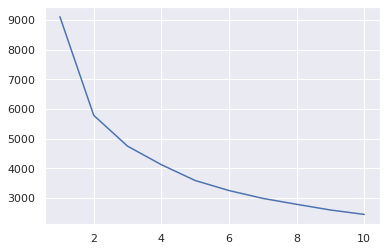

In [9]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_for_clustering_scaled)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3340559865647996
For n_clusters = 3 The average silhouette_score is : 0.23695239695255818
For n_clusters = 4 The average silhouette_score is : 0.2548365498035142
For n_clusters = 5 The average silhouette_score is : 0.24528633596344346
For n_clusters = 6 The average silhouette_score is : 0.22727556485541975
For n_clusters = 7 The average silhouette_score is : 0.22527092167383234
For n_clusters = 8 The average silhouette_score is : 0.2275675789199521
For n_clusters = 9 The average silhouette_score is : 0.224139919524574
For n_clusters = 10 The average silhouette_score is : 0.21730372843114565


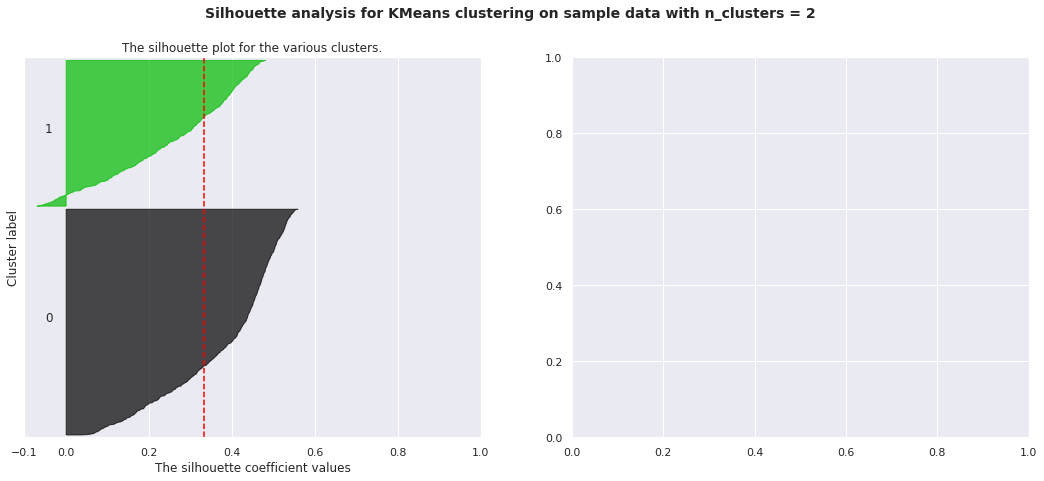

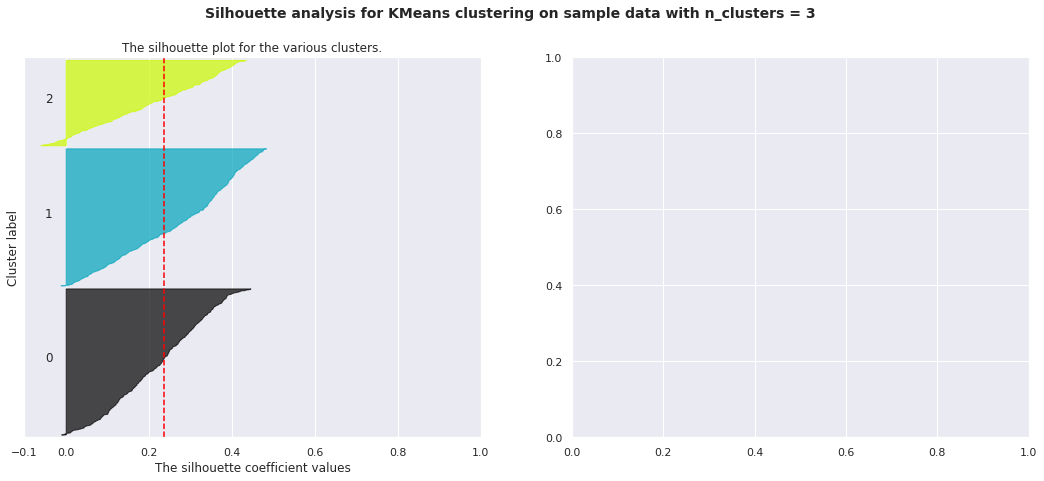

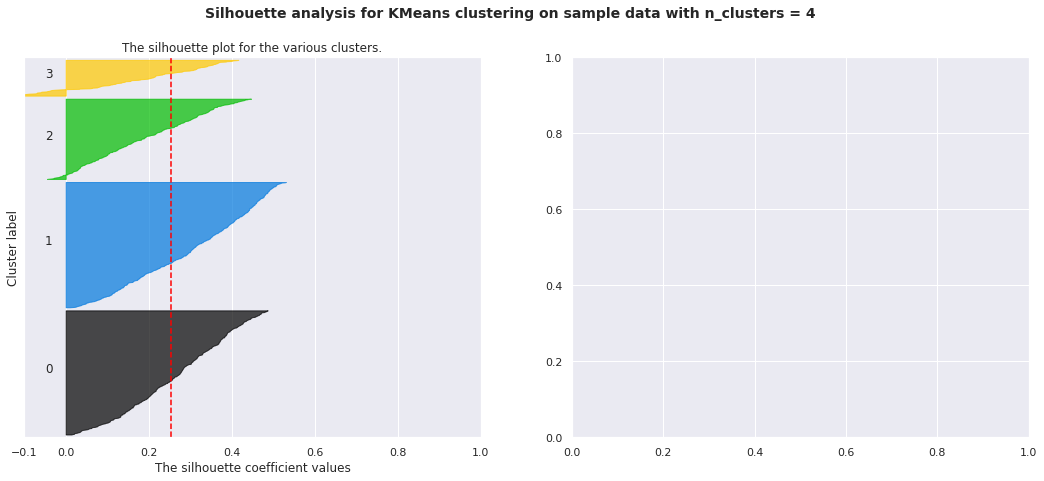

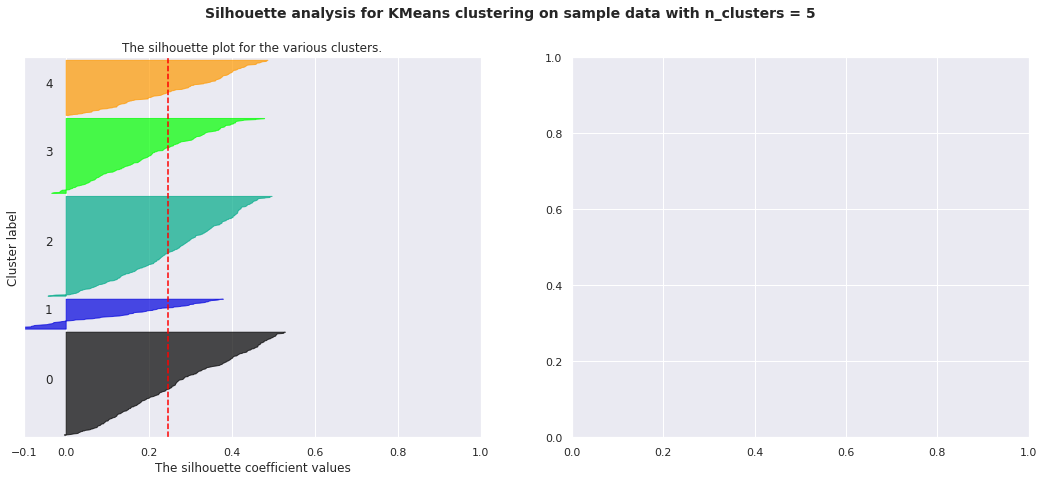

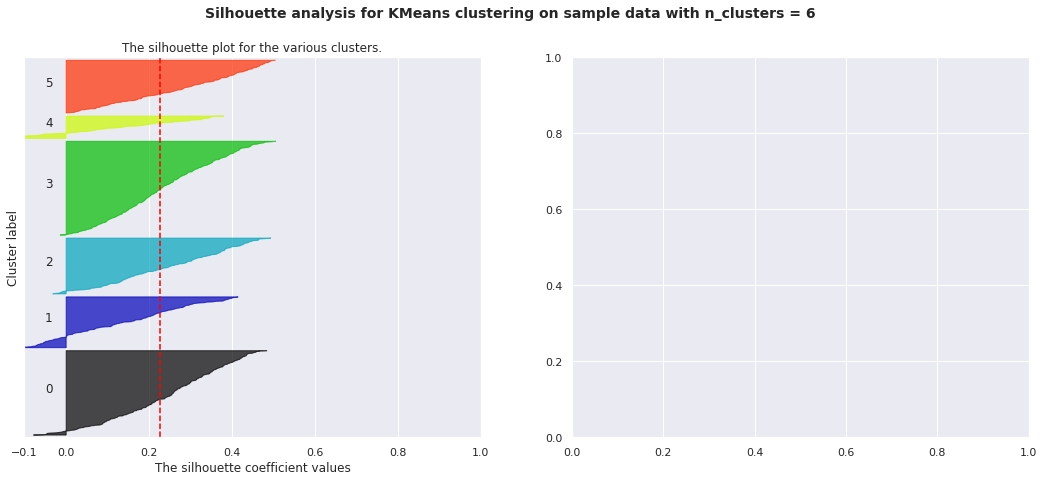

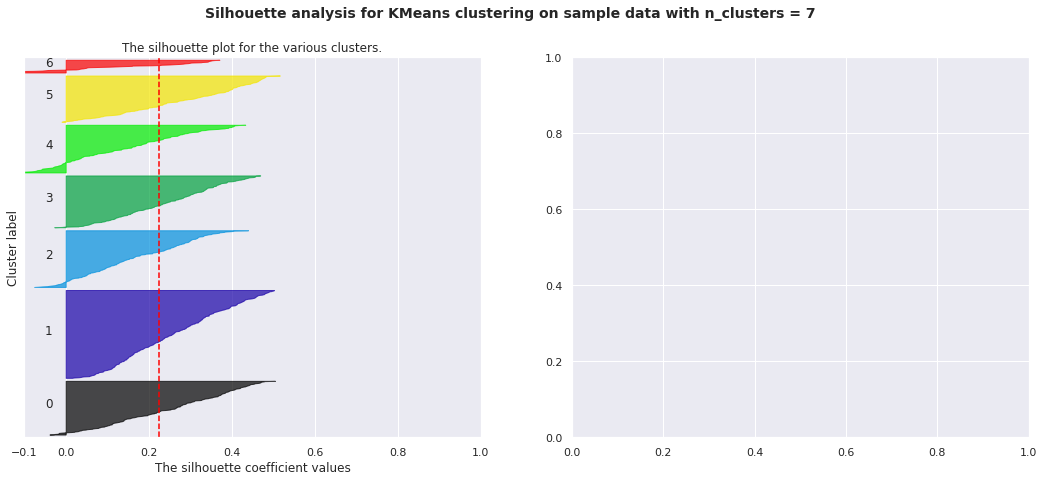

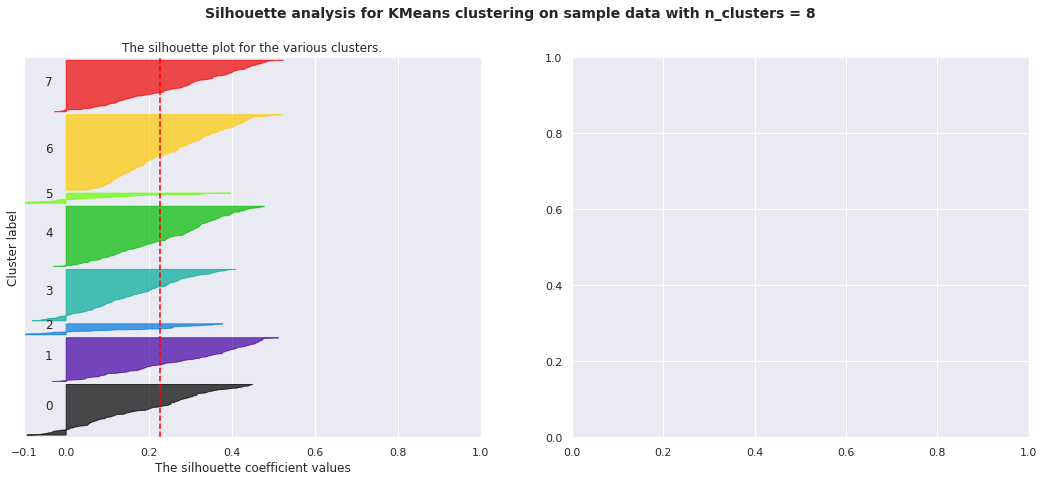

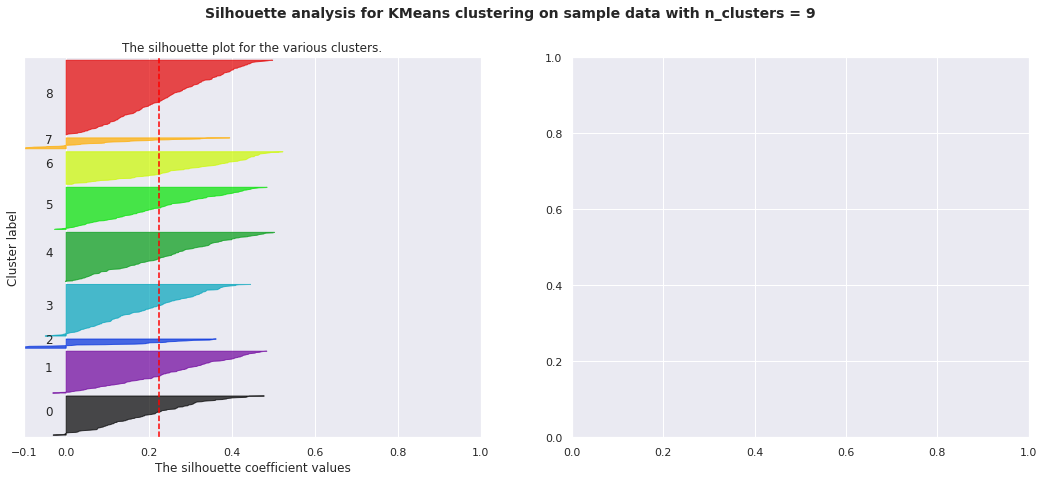

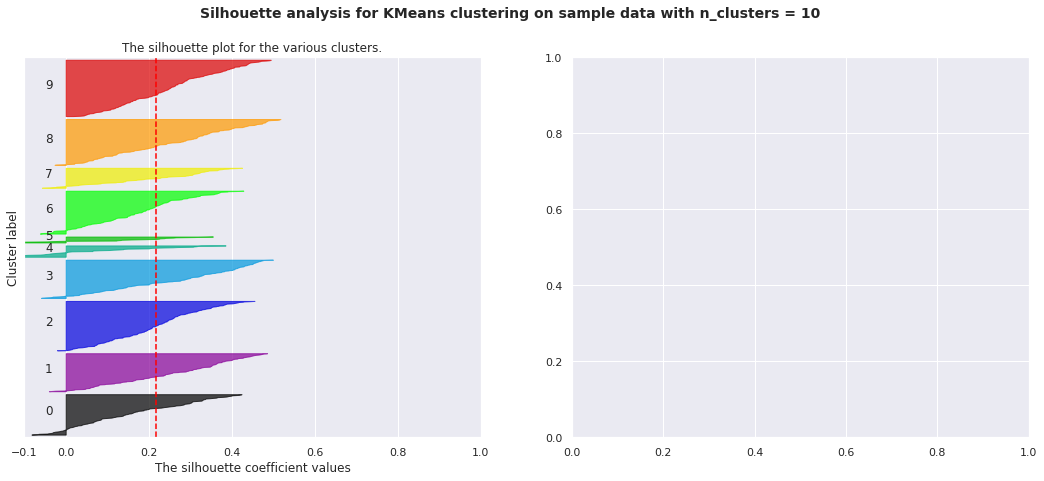

In [10]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(batter_for_clustering_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_for_clustering_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_for_clustering_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(batter_for_clustering_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    



    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [11]:
kmodel =  KMeans(n_clusters=4)
ypred_kmeans = kmodel.fit_predict(batter_for_clustering_scaled)

In [12]:
ypred_kmeans

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [13]:
print('Silhouette score :',np.round(silhouette_score(batter_for_clustering_scaled, ypred_kmeans, metric='euclidean'),3))
print('Calinski-Harabasz Index :',np.round(metrics.calinski_harabasz_score(batter_for_clustering_scaled, ypred_kmeans),3))
print('Davies-Bouldin Index  :',np.round(metrics.davies_bouldin_score(batter_for_clustering_scaled, ypred_kmeans),3))

Silhouette score : 0.253
Calinski-Harabasz Index : 525.024
Davies-Bouldin Index  : 1.291


In [14]:
results = batter_scaled
results['kmeans'] = ypred_kmeans

In [15]:
results

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
0,RG Sharma,INDIA,1.306106,1.077291,1.128480,1.723832,-0.439546,0.981672,2.497986,3
1,MJ Guptill,NZ,1.323618,0.976775,1.093709,2.016256,-0.775858,1.096572,1.769106,3
2,V Kohli,INDIA,3.156513,1.010752,0.676458,2.178075,0.377209,3.017696,2.983906,3
3,PR Stirling,IRE,1.049267,0.905282,1.337106,1.953828,-0.701122,0.636686,1.726852,3
4,AJ Finch,AUS,1.521111,1.265579,1.389262,2.141111,-0.524959,1.142532,1.800797,3
...,...,...,...,...,...,...,...,...,...,...
1297,H Helva,TKY,-1.561929,-2.162907,-0.766536,-1.010660,-1.122845,-1.704109,-0.575985,1
1298,Apon Mustafizur,SRB,-1.586250,-2.809885,-1.218559,-1.010660,-1.122845,-1.775921,-0.575985,1
1299,W Uisuk,THAI,-1.586250,-2.888457,-1.722737,-1.216014,-1.122845,-1.488672,-0.575985,1
1300,I Katzarski,BUL,-1.634894,-2.724235,-2.157374,-1.421368,-1.122845,-1.345047,-0.575985,1


In [16]:
results['kmeans'].value_counts()

1    458
0    431
2    292
3    121
Name: kmeans, dtype: int64

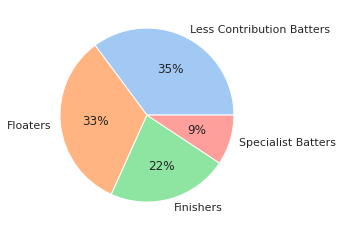

In [17]:
plt.pie(results['kmeans'].value_counts(), colors= sns.color_palette('pastel'), autopct='%.0f%%', labels = ['Less Contribution Batters','Floaters','Finishers','Specialist Batters'])
plt.show()

In [18]:
np.round(kmodel.cluster_centers_,3)

array([[ 0.406,  0.239,  0.263,  0.538, -0.469,  0.659,  0.283],
       [-0.799, -0.989, -0.945, -0.842,  0.081, -0.564, -0.56 ],
       [-0.115,  0.729,  0.617, -0.29 ,  0.666, -0.663, -0.466],
       [ 1.856,  1.134,  1.15 ,  1.972, -0.241,  1.387,  2.237]])

In [19]:
columns = batter_for_clustering_scaled.columns
columns

Index(['average', 'strike_rate', 'boundary_per_ball', 'boundary_index',
       'finishing_index', 'runs_without_boundary_index', 'big_match_index'],
      dtype='object')

In [20]:
cluster_center = pd.DataFrame(data=np.round(kmodel.cluster_centers_,3) , columns = columns, index=('Floaters','Less Contribution Batters','Finishers','Specialist Batters'))
cluster_center['No. of Batters'] = [431,458,292,121]

cols = cluster_center.columns.tolist()
cols = cols[-1:] + cols[:-1]


cluster_center = cluster_center [cols]
cluster_center

,No. of Batters,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
Floaters,431,0.406,0.239,0.263,0.538,-0.469,0.659,0.283
Less Contribution Batters,458,-0.799,-0.989,-0.945,-0.842,0.081,-0.564,-0.560
Finishers,292,-0.115,0.729,0.617,-0.290,0.666,-0.663,-0.466
Specialist Batters,121,1.856,1.134,1.150,1.972,-0.241,1.387,2.237


In [21]:
top10countries = ['INDIA','ENG','PAK','SA','NZ','AUS','WI','SL','BAN','AFG']

In [22]:
results[(results.country.isin(top10countries)) & (results['kmeans'] == 3)].head(7)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
0,RG Sharma,INDIA,1.306106,1.077291,1.128480,1.723832,-0.439546,0.981672,2.497986,3
1,MJ Guptill,NZ,1.323618,0.976775,1.093709,2.016256,-0.775858,1.096572,1.769106,3
2,V Kohli,INDIA,3.156513,1.010752,0.676458,2.178075,0.377209,3.017696,2.983906,3
4,AJ Finch,AUS,1.521111,1.265579,1.389262,2.141111,-0.524959,1.142532,1.800797,3
5,Babar Azam,PAK,2.574734,0.719471,0.519988,2.388357,-0.348796,3.512052,3.712786,3
6,DA Warner,AUS,1.331401,1.110206,1.180636,1.836366,-0.514282,1.142245,2.181082,3
9,JC Buttler,ENG,1.503599,1.134273,0.989396,1.391980,0.078266,1.110934,1.663472,3


In [23]:
results[(results.country.isin(top10countries)) & (results['kmeans'] == 2)].head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
48,Shahid Afridi,PAK,-0.110400,1.447144,1.076323,0.167250,-0.418193,-0.204668,-0.111192,2
59,NLTC Perera,SL,0.398414,1.504834,1.163251,0.265819,0.462622,-0.174794,-0.142883,2
110,AD Russell,WI,0.043315,1.659500,1.650044,0.077715,0.654799,-0.978517,-0.385843,2
135,MM Ali,ENG,-0.031597,0.986331,0.902469,0.109750,0.088943,-0.391954,0.385291,2
136,D Ramdin,WI,-0.034515,0.223266,0.050581,-0.271386,0.585402,-0.164453,-0.364716,2
155,DJG Sammy,WI,-0.174609,1.357954,1.163251,-0.220459,0.724197,-0.770549,-0.575985,2
161,JA Morkel,SA,0.206758,1.173912,0.780771,0.048144,0.419915,-0.313248,-0.575985,2
166,MP Stoinis,AUS,0.894580,1.075521,1.024167,0.420245,0.980434,0.019387,-0.259081,2
167,Gulbadin Naib,AFG,-0.024787,0.367314,0.311363,-0.141603,0.489313,-0.348005,-0.333025,2
171,HH Pandya,INDIA,0.138656,1.315837,0.885083,0.084287,0.211723,-0.196050,-0.575985,2


In [24]:
results[(results.country.isin(top10countries)) & (results['kmeans'] == 0)].head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
7,EJG Morgan,ENG,0.926685,0.957663,0.798156,0.927880,-0.076544,0.677188,0.807830,0
8,Shoaib Malik,PAK,1.182551,0.584979,0.224435,0.539351,0.462622,1.209748,0.279656,0
13,Mahmudullah,BAN,0.464569,0.323427,0.067966,0.237070,0.024883,0.736074,0.015569,0
16,LRPL Taylor,NZ,0.690276,0.469245,-0.018961,0.256784,0.067589,1.061528,0.205712,0
17,Shakib Al Hasan,BAN,0.329340,0.377224,0.363519,0.576314,-0.562327,0.754171,0.427545,0
19,TM Dilshan,SL,0.888743,0.404476,0.676458,1.240840,-0.311428,0.913881,1.431075,0
22,DA Miller,SA,1.248706,1.115161,0.554759,0.538529,0.612093,0.901817,0.184585,0
23,S Dhawan,INDIA,0.862475,0.610461,0.850312,1.578441,-0.882623,1.033377,1.188115,0
24,Tamim Iqbal,BAN,0.488891,0.277770,0.537374,1.032200,-0.781196,0.719126,0.638814,0
27,Umar Akmal,PAK,0.675683,0.481986,0.085352,0.419424,-0.177971,1.179300,0.490926,0


In [25]:
results[(results.country.isin(top10countries)) & (results['kmeans'] == 1)].head(15)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
285,WIA Fernando,SL,-0.686341,-0.512194,-0.540525,-0.517811,-0.765181,-0.172208,-0.575985,1
324,NL McCullum,NZ,-0.734985,-0.298776,-0.575296,-0.880055,0.830962,-0.765378,-0.575985,1
354,BR McDermott,AUS,-0.314703,-0.521396,-0.696994,-0.482490,-0.108574,0.156118,-0.068938,1
355,MV Boucher,SA,-0.116237,-0.412740,-0.644838,-0.482490,0.403901,0.306636,-0.575985,1
399,Nurul Hasan,BAN,-0.640616,0.113548,-0.349285,-0.726450,0.313150,-0.433605,-0.575985,1
404,AT Carey,AUS,-0.774873,-0.026253,-0.053732,-0.599953,-0.097897,-0.720855,-0.575985,1
432,Mahedi Hasan,BAN,-0.618240,-0.238962,-0.418827,-0.671416,0.270444,-0.542760,-0.575985,1
456,DL Vettori,NZ,-0.607539,-0.043241,-0.696994,-0.824199,0.334503,-0.202657,-0.575985,1
463,Mosaddek Hossain,BAN,0.091958,-0.116504,-0.592682,-0.490704,0.654799,0.306636,-0.575985,1
474,Fawad Alam,PAK,-0.138613,0.200968,-0.714380,-0.744522,0.761565,0.103838,-0.575985,1


In [26]:
results = np.round(results,3)

# Defining accuracy Metrics

In [27]:
def get_accuracy_metrics(y_pred,y_test):

  bal_acc = metrics.balanced_accuracy_score(y_test, y_pred)
  print ('The balanced accuracy on test data is %s' % (round(bal_acc,5)))

  f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
  print('F1 score micro :',round(f1_micro ,5))

  f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
  print('F1 score macro :',round(f1_macro ,5))

  f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
  print('F1 score weighted :',round(f1_weighted,5))

  recall = metrics.recall_score(y_test, y_pred, average='macro')
  print('Recall score :',recall)

  precision = metrics.precision_score(y_test, y_pred, average='macro')
  print('Precision score :',precision)

  print('\n\n\n\n\n\n\n\n')

  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(confusion_matrix,annot=True, fmt="d",cmap="YlGnBu")


# Classification

## Random Forest

In [28]:
X_train, X_test, y_train, y_test = train_test_split(results.drop('kmeans',axis=1), results['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)
X_test.drop(['name','country'],axis=1,inplace=True)

In [29]:
X_train

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
1122,-0.525,0.819,-1.027,-1.186,1.925,-0.719,-0.576
438,0.469,0.588,0.694,0.669,-0.151,0.437,0.385
579,0.245,1.228,1.320,1.043,-1.123,0.019,0.935
842,-0.200,2.277,1.737,-0.418,1.247,-1.002,-0.576
1161,-1.173,-1.047,-0.575,-0.764,-1.123,-0.900,-0.576
...,...,...,...,...,...,...,...
1095,-0.998,-0.476,0.485,-0.463,-0.231,-1.321,-0.576
1130,-0.557,-0.850,-1.045,-0.805,0.212,-0.268,-0.576
1294,-1.513,-2.446,-2.157,-1.421,-0.055,-1.187,-0.576
860,-0.845,0.003,-0.106,-0.929,1.370,-1.245,-0.576


In [30]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ypred_rfc = rfc.predict(X_test)

In [31]:
fi_ovr = np.round(rfc.feature_importances_.tolist(),3)

In [32]:
dict_ovr = dict(zip(columns,np.array(fi_ovr)))
dict_ovr

{'average': 0.154,
 'strike_rate': 0.178,
 'boundary_per_ball': 0.153,
 'boundary_index': 0.236,
 'finishing_index': 0.079,
 'runs_without_boundary_index': 0.12,
 'big_match_index': 0.08}

The balanced accuracy on test data is 0.95165
F1 score micro : 0.95652
F1 score macro : 0.94968
F1 score weighted : 0.95649
Recall score : 0.9516501834074609
Precision score : 0.9478370407217882











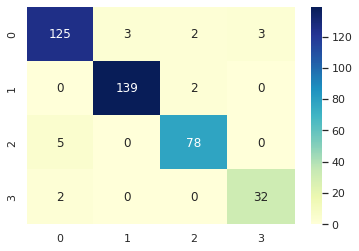

In [33]:
get_accuracy_metrics(ypred_rfc,y_test)

In [34]:
final_index = results.copy()

In [35]:
final_index['rfc_score'] = 0
for i in columns:
  final_index['rfc_score'] = np.round(final_index['rfc_score'] + (final_index[i] * dict_ovr.get(i)),3)   

In [36]:
final_index[final_index.country.isin(top10countries)].sort_values('rfc_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score
318,ML Hayden,AUS,3.140,1.232,1.911,3.142,0.655,0.626,4.114,3,2.193
2,V Kohli,INDIA,3.157,1.011,0.676,2.178,0.377,3.018,2.984,3,1.914
284,A Symonds,AUS,2.830,2.132,1.598,1.790,0.820,1.795,1.347,3,1.869
5,Babar Azam,PAK,2.575,0.719,0.520,2.388,-0.349,3.512,3.713,3,1.859
148,DP Conway,NZ,3.026,1.070,0.937,2.299,0.447,2.469,1.906,3,1.825
30,Mohammad Rizwan,PAK,3.046,0.698,0.520,2.211,0.302,2.924,2.942,3,1.805
271,SA Yadav,INDIA,1.940,1.998,2.102,2.138,0.212,0.474,2.942,3,1.791
58,DJ Malan,ENG,2.164,0.994,1.094,2.545,-0.359,1.956,3.343,3,1.752
20,KL Rahul,INDIA,2.104,1.181,1.042,2.323,-0.402,2.080,3.491,3,1.738
420,MN van Wyk,SA,1.794,1.210,1.494,2.451,-0.359,0.676,3.956,3,1.667


## KNN

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
ypred_knn = knn.predict(X_test)

The balanced accuracy on test data is 0.93795
F1 score micro : 0.94629
F1 score macro : 0.94039
F1 score weighted : 0.94638
Recall score : 0.9379523939528994
Precision score : 0.9430932379006809











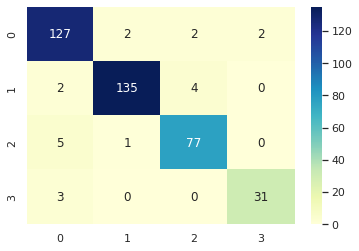

In [38]:
get_accuracy_metrics(ypred_knn,y_test)

## XGBoost

In [39]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
ypred_xgb = xgb.predict(X_test)

The balanced accuracy on test data is 0.95053
F1 score micro : 0.95908
F1 score macro : 0.94889
F1 score weighted : 0.95918
Recall score : 0.9505346378219929
Precision score : 0.9474324967336166











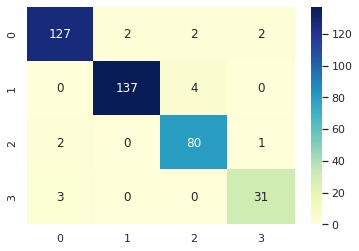

In [40]:
get_accuracy_metrics(ypred_xgb,y_test)

In [41]:
importance = np.round(xgb.feature_importances_,3)
dict_xgb = dict(zip(columns,importance))
dict_xgb

{'average': 0.084,
 'strike_rate': 0.243,
 'boundary_per_ball': 0.103,
 'boundary_index': 0.209,
 'finishing_index': 0.063,
 'runs_without_boundary_index': 0.124,
 'big_match_index': 0.173}

In [42]:
final_index['xgb_score'] = 0
for i in columns:
  final_index['xgb_score'] = np.round(final_index['xgb_score'] + (final_index[i] * dict_xgb.get(i)),3)   

In [43]:
final_index[final_index.country.isin(top10countries)].sort_values('xgb_score',ascending = False).head(10).drop(['rfc_score'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,xgb_score
318,ML Hayden,AUS,3.140,1.232,1.911,3.142,0.655,0.626,4.114,3,2.248
5,Babar Azam,PAK,2.575,0.719,0.520,2.388,-0.349,3.512,3.713,3,1.999
2,V Kohli,INDIA,3.157,1.011,0.676,2.178,0.377,3.018,2.984,3,1.950
271,SA Yadav,INDIA,1.940,1.998,2.102,2.138,0.212,0.474,2.942,3,1.894
20,KL Rahul,INDIA,2.104,1.181,1.042,2.323,-0.402,2.080,3.491,3,1.894
58,DJ Malan,ENG,2.164,0.994,1.094,2.545,-0.359,1.956,3.343,3,1.867
420,MN van Wyk,SA,1.794,1.210,1.494,2.451,-0.359,0.676,3.956,3,1.856
30,Mohammad Rizwan,PAK,3.046,0.698,0.520,2.211,0.302,2.924,2.942,3,1.833
284,A Symonds,AUS,2.830,2.132,1.598,1.790,0.820,1.795,1.347,3,1.803
148,DP Conway,NZ,3.026,1.070,0.937,2.299,0.447,2.469,1.906,3,1.755


## Voting  Ensembles

In [44]:
xgb = XGBClassifier()
dtree = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [45]:
voting = VotingClassifier(
    estimators=[('random_forest', rfc), ('xg_boost', xgb), ('decision_tree', dtree)],
    voting='hard')

In [46]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('xg_boost', XGBClassifier()),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42))])

In [47]:
for clf in (rfc,dtree,xgb,voting):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9539641943734015
DecisionTreeClassifier 0.9156010230179028
XGBClassifier 0.959079283887468
VotingClassifier 0.9539641943734015


In [48]:
ypred_voting = voting.predict(X_test)

The balanced accuracy on test data is 0.94678
F1 score micro : 0.95396
F1 score macro : 0.94512
F1 score weighted : 0.95404
Recall score : 0.9467752393257522
Precision score : 0.9436446179457378











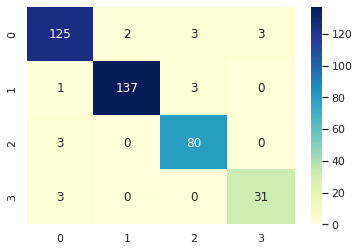

In [49]:
get_accuracy_metrics(ypred_voting,y_test)

In [50]:
def compute_feature_importance(voting, weights):

    feature_importance = dict()
    for est in voting.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    ## print(feature_importance.values())

    fe_scores = [0]*len(list(feature_importance.values())[0])

    ## print(fe_scores)
    for idx, imp_score in enumerate(feature_importance.values()):
        ## print(imp_score)
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [51]:
dict_voting = dict(zip(columns,np.round(compute_feature_importance(voting, [1/3,1/3,1/3]),3)))
dict_voting

{'average': 0.11,
 'strike_rate': 0.232,
 'boundary_per_ball': 0.092,
 'boundary_index': 0.247,
 'finishing_index': 0.064,
 'runs_without_boundary_index': 0.129,
 'big_match_index': 0.126}

In [52]:
final_index['voting_score'] = 0
for i in columns:
  final_index['voting_score'] = np.round(final_index['voting_score'] + (final_index[i] * dict_voting.get(i)),3)

In [53]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_score',ascending = False).head(10).drop(['rfc_score','xgb_score'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,voting_score
318,ML Hayden,AUS,3.140,1.232,1.911,3.142,0.655,0.626,4.114,3,2.224
5,Babar Azam,PAK,2.575,0.719,0.520,2.388,-0.349,3.512,3.713,3,1.987
2,V Kohli,INDIA,3.157,1.011,0.676,2.178,0.377,3.018,2.984,3,1.971
30,Mohammad Rizwan,PAK,3.046,0.698,0.520,2.211,0.302,2.924,2.942,3,1.858
20,KL Rahul,INDIA,2.104,1.181,1.042,2.323,-0.402,2.080,3.491,3,1.857
284,A Symonds,AUS,2.830,2.132,1.598,1.790,0.820,1.795,1.347,3,1.849
58,DJ Malan,ENG,2.164,0.994,1.094,2.545,-0.359,1.956,3.343,3,1.849
271,SA Yadav,INDIA,1.940,1.998,2.102,2.138,0.212,0.474,2.942,3,1.844
148,DP Conway,NZ,3.026,1.070,0.937,2.299,0.447,2.469,1.906,3,1.823
420,MN van Wyk,SA,1.794,1.210,1.494,2.451,-0.359,0.676,3.956,3,1.782


In [54]:
middle_ovr = pd.DataFrame()

# One against all


## For 0

In [55]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:0,0:1})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [56]:
rfc_0 = RandomForestClassifier()
rfc_0.fit(X_train, y_train)
ypred_rfc_0 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_0 = np.round(rfc_0.feature_importances_,3)
dict_0 = dict(zip(columns,fi_0))
dict_0

{'average': 0.171,
 'strike_rate': 0.075,
 'boundary_per_ball': 0.074,
 'boundary_index': 0.276,
 'finishing_index': 0.096,
 'runs_without_boundary_index': 0.186,
 'big_match_index': 0.122}

In [57]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
7,EJG Morgan,ENG,0.927,0.958,0.798,0.928,-0.077,0.677,0.808,1
8,Shoaib Malik,PAK,1.183,0.585,0.224,0.539,0.463,1.210,0.280,1
13,Mahmudullah,BAN,0.465,0.323,0.068,0.237,0.025,0.736,0.016,1
14,KJ O'Brien,IRE,0.210,0.772,0.694,0.548,-0.605,0.298,0.142,1
16,LRPL Taylor,NZ,0.690,0.469,-0.019,0.257,0.068,1.062,0.206,1
...,...,...,...,...,...,...,...,...,...,...
960,M Bhanuka,SL,-0.297,-0.430,-0.315,0.016,-1.123,0.594,-0.576,1
970,Usman Waheed,KUW,0.221,-0.149,-0.158,0.016,0.212,0.450,-0.576,1
971,N Wijesekera,AUT,-0.297,0.112,-0.627,-0.395,-1.123,1.025,-0.576,1
976,M Dixit,LUX,-0.322,-0.534,-0.089,0.221,-1.123,-0.052,-0.576,1


In [58]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_0.get(i)),3)

In [59]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,rbml_score
559,A McAuley,IOM,2.086,-0.366,-0.680,0.879,-0.055,3.983,-0.576,1.189
516,JP Inglis,AUS,1.629,1.289,0.816,1.454,-0.231,2.269,-0.576,1.167
682,DK Mathias,BHR,2.005,-0.033,0.364,1.864,0.212,1.384,-0.576,1.089
334,AN Kervezee,NED,1.270,0.042,-0.506,0.632,-0.589,3.093,1.537,1.063
270,TC Barker,LUX,1.000,0.464,0.068,1.111,-1.123,2.653,1.188,1.048
178,RN ten Doeschate,NED,2.135,0.842,-0.158,0.221,1.199,1.893,0.797,1.041
116,MK Pandey,INDIA,2.457,0.603,-0.054,0.272,1.626,1.482,0.385,1.015
660,Mohammed Asghar,KUW,1.162,0.961,1.285,2.275,-1.123,1.025,-0.576,1.007
50,KC Sangakkara,SL,1.201,0.369,0.242,1.043,-0.215,1.835,1.019,0.983
127,SJ Baard,NAM,1.086,0.196,0.120,1.076,-0.482,1.743,1.537,0.973


In [60]:
middle_ovr = results_new[results_new.kmeans == 1].copy()

## For 1

In [61]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:1,2:0,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [62]:
rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train, y_train)
ypred_rfc_1 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_1 = np.round(rfc_1.feature_importances_,3)
dict_1 = dict(zip(columns,fi_1))
dict_1

{'average': 0.152,
 'strike_rate': 0.383,
 'boundary_per_ball': 0.199,
 'boundary_index': 0.161,
 'finishing_index': 0.027,
 'runs_without_boundary_index': 0.054,
 'big_match_index': 0.025}

In [63]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
258,Aizaz Khan,HKG,-0.492,-0.028,-0.506,-0.648,0.132,-0.099,-0.576,1
275,L Siaka,PNG,-0.652,-0.173,-0.071,-0.326,-0.765,-0.364,-0.576,1
285,WIA Fernando,SL,-0.686,-0.512,-0.541,-0.518,-0.765,-0.172,-0.576,1
319,Waqas Barkat,HKG,-0.497,-0.599,-0.853,-0.600,-0.482,0.387,-0.576,1
324,NL McCullum,NZ,-0.735,-0.299,-0.575,-0.880,0.831,-0.765,-0.576,1
...,...,...,...,...,...,...,...,...,...,...
1297,H Helva,TKY,-1.562,-2.163,-0.767,-1.011,-1.123,-1.704,-0.576,1
1298,Apon Mustafizur,SRB,-1.586,-2.810,-1.219,-1.011,-1.123,-1.776,-0.576,1
1299,W Uisuk,THAI,-1.586,-2.888,-1.723,-1.216,-1.123,-1.489,-0.576,1
1300,I Katzarski,BUL,-1.635,-2.724,-2.157,-1.421,-1.123,-1.345,-0.576,1


In [64]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_1.get(i)),3)

In [65]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,rbml_score
474,Fawad Alam,PAK,-0.139,0.201,-0.714,-0.745,0.762,0.104,-0.576,-0.193
1104,SE Rutherford,WI,-0.808,0.366,-0.228,-0.600,-1.123,-0.483,-0.576,-0.195
463,Mosaddek Hossain,BAN,0.092,-0.117,-0.593,-0.491,0.655,0.307,-0.576,-0.207
776,V Mbazo,BOT,0.034,-0.248,-0.506,-0.365,0.404,0.430,-0.576,-0.230
994,DR Flynn,NZ,-0.706,0.232,-0.454,-0.600,-1.123,-0.210,-0.576,-0.260
564,JP Faulkner,AUS,-0.448,0.216,-0.645,-0.873,0.954,-0.380,-0.576,-0.263
442,RG Aga,KENYA,-0.559,-0.016,-0.384,-0.509,-0.530,-0.029,0.016,-0.265
399,Nurul Hasan,BAN,-0.641,0.114,-0.349,-0.726,0.313,-0.434,-0.576,-0.268
728,Suraj Kumar,OMA,-0.676,-0.042,-0.089,-0.525,-0.151,-0.555,-0.576,-0.270
445,Anwar Arudin,MAL,-0.877,-0.254,0.450,-0.209,-1.123,-0.993,-0.576,-0.272


In [66]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

## For 2

In [67]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:1,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [68]:
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train, y_train)
ypred_rfc_2 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_2 = np.round(rfc_2.feature_importances_,3)
dict_2 = dict(zip(columns,fi_2))
dict_2

{'average': 0.084,
 'strike_rate': 0.212,
 'boundary_per_ball': 0.166,
 'boundary_index': 0.149,
 'finishing_index': 0.158,
 'runs_without_boundary_index': 0.176,
 'big_match_index': 0.055}

In [69]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
48,Shahid Afridi,PAK,-0.110,1.447,1.076,0.167,-0.418,-0.205,-0.111,1
59,NLTC Perera,SL,0.398,1.505,1.163,0.266,0.463,-0.175,-0.143,1
86,E Chigumbura,ZIM,-0.005,1.115,0.972,0.251,-0.263,-0.293,-0.006,1
110,AD Russell,WI,0.043,1.659,1.650,0.078,0.655,-0.979,-0.386,1
135,MM Ali,ENG,-0.032,0.986,0.902,0.110,0.089,-0.392,0.385,1
...,...,...,...,...,...,...,...,...,...,...
1186,D Wheatley,BHM,-1.051,0.166,0.833,-0.600,-0.055,-1.359,-0.576,1
1193,CE McConchie,NZ,-0.297,0.183,-0.297,-0.805,1.546,-0.555,-0.576,1
1195,SNJ O'Keefe,AUS,-1.231,0.494,1.181,-0.600,-1.123,-1.417,-0.576,1
1198,R Abdulkareem,NGA,-0.346,-0.433,0.016,-0.600,1.546,-0.914,-0.576,1


In [70]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_2.get(i)),3)

In [71]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,rbml_score
913,Khalid Ahmadi,BELG,1.697,3.121,3.476,0.221,2.438,-1.082,-0.576,1.578
762,Mohammed Nurji,MWI,3.059,2.197,1.963,0.879,2.080,-0.096,-0.576,1.460
731,Ritik Tomar,CZK-R,1.649,2.617,1.963,0.495,1.546,0.019,-0.576,1.309
876,SC Kuggeleijn,NZ,0.068,3.695,3.476,-0.189,1.546,-1.381,-0.576,1.307
591,R Shepherd,WI,2.880,1.635,1.354,1.180,1.546,0.115,-0.576,1.222
536,Nouman Sarwar,QAT,3.724,0.894,0.833,0.586,2.438,0.307,-0.576,1.135
631,VR Iyer,INDIA,1.381,1.879,2.085,0.925,1.167,-0.227,-0.576,1.110
922,DR Sams,AUS,0.481,2.844,2.415,0.221,1.012,-0.613,-0.576,1.097
697,Abrar Bilal,AUT,1.907,1.470,1.685,0.906,1.546,-0.172,-0.576,1.069
1002,Abu Hider,BAN,3.789,0.912,1.476,0.057,3.148,-1.187,-0.576,1.020


In [72]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

## For 3

In [73]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:1,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [74]:
rfc_3 = RandomForestClassifier()
rfc_3.fit(X_train, y_train)
ypred_rfc_3 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_3 = np.round(rfc_3.feature_importances_,3)
dict_3 = dict(zip(columns,fi_3))
dict_3

{'average': 0.266,
 'strike_rate': 0.065,
 'boundary_per_ball': 0.061,
 'boundary_index': 0.244,
 'finishing_index': 0.027,
 'runs_without_boundary_index': 0.085,
 'big_match_index': 0.251}

In [75]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans
0,RG Sharma,INDIA,1.306,1.077,1.128,1.724,-0.440,0.982,2.498,1
1,MJ Guptill,NZ,1.324,0.977,1.094,2.016,-0.776,1.097,1.769,1
2,V Kohli,INDIA,3.157,1.011,0.676,2.178,0.377,3.018,2.984,1
3,PR Stirling,IRE,1.049,0.905,1.337,1.954,-0.701,0.637,1.727,1
4,AJ Finch,AUS,1.521,1.266,1.389,2.141,-0.525,1.143,1.801,1
...,...,...,...,...,...,...,...,...,...,...
709,DL Maddy,ENG,0.895,1.137,1.111,1.659,-1.123,1.384,2.065,1
715,AP Devcich,NZ,0.846,1.111,2.033,2.480,-1.123,0.235,2.065,1
772,Irfan Bhima,MWI,0.530,0.080,0.798,1.659,-1.123,0.450,2.065,1
865,K Birkenstock,NAM,0.773,2.509,2.867,1.248,0.212,-0.483,2.065,1


In [76]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_3.get(i)),3)

In [77]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,rbml_score
361,Zeeshan Kukikhel,HUN,4.543,2.344,3.284,8.230,-1.123,1.958,7.347,5.548
343,Azhar Andani,PORT,4.859,1.595,1.042,5.355,-1.123,7.488,7.347,5.217
478,M Spoors,CAN,4.437,1.008,1.424,3.343,1.012,1.915,5.762,3.785
138,Taranjeet Singh,ROM,3.278,2.595,3.302,4.974,-0.359,0.820,4.706,3.697
369,Saim Hussain,BUL,3.147,1.859,1.337,2.959,-0.231,3.227,6.470,3.654
184,Muhammad Waseem,UAE,2.621,1.565,1.633,3.507,-0.680,1.695,5.583,3.282
440,LA Dunbar,SRB,3.351,2.102,2.502,3.234,0.655,-0.076,4.706,3.163
376,Dylan Steyn,CZK-R,2.232,1.543,1.737,3.644,-1.123,2.413,4.706,3.045
318,ML Hayden,AUS,3.140,1.232,1.911,3.142,0.655,0.626,4.114,2.903
102,S Davizi,CZK-R,2.604,1.420,1.581,3.421,-0.562,2.136,3.871,2.855


In [78]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

# Role Based Metrics

In [79]:
middle_ovr

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rbml_score
7,EJG Morgan,ENG,0.927,0.958,0.798,0.928,-0.077,0.677,0.808,1,0.764
8,Shoaib Malik,PAK,1.183,0.585,0.224,0.539,0.463,1.210,0.280,1,0.715
13,Mahmudullah,BAN,0.465,0.323,0.068,0.237,0.025,0.736,0.016,1,0.315
14,KJ O'Brien,IRE,0.210,0.772,0.694,0.548,-0.605,0.298,0.142,1,0.310
16,LRPL Taylor,NZ,0.690,0.469,-0.019,0.257,0.068,1.062,0.206,1,0.453
...,...,...,...,...,...,...,...,...,...,...,...
709,DL Maddy,ENG,0.895,1.137,1.111,1.659,-1.123,1.384,2.065,1,1.391
715,AP Devcich,NZ,0.846,1.111,2.033,2.480,-1.123,0.235,2.065,1,1.534
772,Irfan Bhima,MWI,0.530,0.080,0.798,1.659,-1.123,0.450,2.065,1,1.126
865,K Birkenstock,NAM,0.773,2.509,2.867,1.248,0.212,-0.483,2.065,1,1.332


In [80]:
final_index = pd.merge(final_index,middle_ovr[['name','country','rbml_score']],on=['name','country'],how='left')

In [81]:
final_index[final_index.country.isin(top10countries)].sort_values('rbml_score',ascending = False).head(10).drop(['rfc_score','xgb_score','voting_score'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rbml_score
318,ML Hayden,AUS,3.140,1.232,1.911,3.142,0.655,0.626,4.114,3,2.903
5,Babar Azam,PAK,2.575,0.719,0.520,2.388,-0.349,3.512,3.713,3,2.569
2,V Kohli,INDIA,3.157,1.011,0.676,2.178,0.377,3.018,2.984,3,2.494
30,Mohammad Rizwan,PAK,3.046,0.698,0.520,2.211,0.302,2.924,2.942,3,2.421
58,DJ Malan,ENG,2.164,0.994,1.094,2.545,-0.359,1.956,3.343,3,2.324
20,KL Rahul,INDIA,2.104,1.181,1.042,2.323,-0.402,2.080,3.491,3,2.310
420,MN van Wyk,SA,1.794,1.210,1.494,2.451,-0.359,0.676,3.956,3,2.285
148,DP Conway,NZ,3.026,1.070,0.937,2.299,0.447,2.469,1.906,3,2.193
271,SA Yadav,INDIA,1.940,1.998,2.102,2.138,0.212,0.474,2.942,3,2.080
284,A Symonds,AUS,2.830,2.132,1.598,1.790,0.820,1.795,1.347,3,1.939


In [82]:
final_index

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
0,RG Sharma,INDIA,1.306,1.077,1.128,1.724,-0.440,0.982,2.498,3,1.256,1.374,1.338,1.605
1,MJ Guptill,NZ,1.324,0.977,1.094,2.016,-0.776,1.097,1.769,3,1.234,1.275,1.287,1.491
2,V Kohli,INDIA,3.157,1.011,0.676,2.178,0.377,3.018,2.984,3,1.914,1.950,1.971,2.494
3,PR Stirling,IRE,1.049,0.905,1.337,1.954,-0.701,0.637,1.727,3,1.148,1.188,1.186,1.365
4,AJ Finch,AUS,1.521,1.266,1.389,2.141,-0.525,1.143,1.801,3,1.417,1.447,1.458,1.629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,H Helva,TKY,-1.562,-2.163,-0.767,-1.011,-1.123,-1.704,-0.576,1,-1.321,-1.329,-1.360,-1.517
1298,Apon Mustafizur,SRB,-1.586,-2.810,-1.219,-1.011,-1.123,-1.776,-0.576,1,-1.518,-1.544,-1.562,-1.863
1299,W Uisuk,THAI,-1.586,-2.888,-1.723,-1.216,-1.123,-1.489,-0.576,1,-1.623,-1.622,-1.640,-2.010
1300,I Katzarski,BUL,-1.635,-2.724,-2.157,-1.421,-1.123,-1.345,-0.576,1,-1.698,-1.656,-1.680,-2.067


In [83]:
final_index[final_index.country.isin(top10countries)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
318,ML Hayden,AUS,3.140,1.232,1.911,3.142,0.655,0.626,4.114,3,2.193,2.248,2.224,2.903
5,Babar Azam,PAK,2.575,0.719,0.520,2.388,-0.349,3.512,3.713,3,1.859,1.999,1.987,2.569
2,V Kohli,INDIA,3.157,1.011,0.676,2.178,0.377,3.018,2.984,3,1.914,1.950,1.971,2.494
30,Mohammad Rizwan,PAK,3.046,0.698,0.520,2.211,0.302,2.924,2.942,3,1.805,1.833,1.858,2.421
58,DJ Malan,ENG,2.164,0.994,1.094,2.545,-0.359,1.956,3.343,3,1.752,1.867,1.849,2.324
20,KL Rahul,INDIA,2.104,1.181,1.042,2.323,-0.402,2.080,3.491,3,1.738,1.894,1.857,2.310
420,MN van Wyk,SA,1.794,1.210,1.494,2.451,-0.359,0.676,3.956,3,1.667,1.856,1.782,2.285
148,DP Conway,NZ,3.026,1.070,0.937,2.299,0.447,2.469,1.906,3,1.825,1.755,1.823,2.193
271,SA Yadav,INDIA,1.940,1.998,2.102,2.138,0.212,0.474,2.942,3,1.791,1.894,1.844,2.080
284,A Symonds,AUS,2.830,2.132,1.598,1.790,0.820,1.795,1.347,3,1.869,1.803,1.849,1.939


In [84]:
final_index.sort_values('rfc_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
361,Zeeshan Kukikhel,HUN,4.543,2.344,3.284,8.230,-1.123,1.958,7.347,3,4.295,4.453,4.486,5.548
343,Azhar Andani,PORT,4.859,1.595,1.042,5.355,-1.123,7.488,7.347,3,3.853,4.151,4.143,5.217
138,Taranjeet Singh,ROM,3.278,2.595,3.302,4.974,-0.359,0.820,4.706,3,3.092,3.179,3.172,3.697
478,M Spoors,CAN,4.437,1.008,1.424,3.343,1.012,1.915,5.762,3,2.640,2.762,2.717,3.785
369,Saim Hussain,BUL,3.147,1.859,1.337,2.959,-0.231,3.227,6.470,3,2.606,2.976,2.847,3.654
440,LA Dunbar,SRB,3.351,2.102,2.502,3.234,0.655,-0.076,4.706,3,2.455,2.572,2.511,3.163
103,R Satheesan,ROM,2.581,2.669,2.884,3.351,-0.109,0.867,2.942,3,2.434,2.473,2.472,2.663
184,Muhammad Waseem,UAE,2.621,1.565,1.633,3.507,-0.680,1.695,5.583,3,2.357,2.634,2.545,3.282
376,Dylan Steyn,CZK-R,2.232,1.543,1.737,3.644,-1.123,2.413,4.706,3,2.322,2.545,2.496,3.045
577,Mirza Ahsan,AUT,3.108,4.220,3.284,1.043,1.925,-0.145,2.445,3,2.309,2.368,2.293,2.209


In [85]:
final_index.sort_values('xgb_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
361,Zeeshan Kukikhel,HUN,4.543,2.344,3.284,8.230,-1.123,1.958,7.347,3,4.295,4.453,4.486,5.548
343,Azhar Andani,PORT,4.859,1.595,1.042,5.355,-1.123,7.488,7.347,3,3.853,4.151,4.143,5.217
138,Taranjeet Singh,ROM,3.278,2.595,3.302,4.974,-0.359,0.820,4.706,3,3.092,3.179,3.172,3.697
369,Saim Hussain,BUL,3.147,1.859,1.337,2.959,-0.231,3.227,6.470,3,2.606,2.976,2.847,3.654
478,M Spoors,CAN,4.437,1.008,1.424,3.343,1.012,1.915,5.762,3,2.640,2.762,2.717,3.785
184,Muhammad Waseem,UAE,2.621,1.565,1.633,3.507,-0.680,1.695,5.583,3,2.357,2.634,2.545,3.282
440,LA Dunbar,SRB,3.351,2.102,2.502,3.234,0.655,-0.076,4.706,3,2.455,2.572,2.511,3.163
376,Dylan Steyn,CZK-R,2.232,1.543,1.737,3.644,-1.123,2.413,4.706,3,2.322,2.545,2.496,3.045
103,R Satheesan,ROM,2.581,2.669,2.884,3.351,-0.109,0.867,2.942,3,2.434,2.473,2.472,2.663
577,Mirza Ahsan,AUT,3.108,4.220,3.284,1.043,1.925,-0.145,2.445,3,2.309,2.368,2.293,2.209


In [86]:
final_index.sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
361,Zeeshan Kukikhel,HUN,4.543,2.344,3.284,8.230,-1.123,1.958,7.347,3,4.295,4.453,4.486,5.548
343,Azhar Andani,PORT,4.859,1.595,1.042,5.355,-1.123,7.488,7.347,3,3.853,4.151,4.143,5.217
478,M Spoors,CAN,4.437,1.008,1.424,3.343,1.012,1.915,5.762,3,2.640,2.762,2.717,3.785
138,Taranjeet Singh,ROM,3.278,2.595,3.302,4.974,-0.359,0.820,4.706,3,3.092,3.179,3.172,3.697
369,Saim Hussain,BUL,3.147,1.859,1.337,2.959,-0.231,3.227,6.470,3,2.606,2.976,2.847,3.654
184,Muhammad Waseem,UAE,2.621,1.565,1.633,3.507,-0.680,1.695,5.583,3,2.357,2.634,2.545,3.282
440,LA Dunbar,SRB,3.351,2.102,2.502,3.234,0.655,-0.076,4.706,3,2.455,2.572,2.511,3.163
376,Dylan Steyn,CZK-R,2.232,1.543,1.737,3.644,-1.123,2.413,4.706,3,2.322,2.545,2.496,3.045
318,ML Hayden,AUS,3.140,1.232,1.911,3.142,0.655,0.626,4.114,3,2.193,2.248,2.224,2.903
102,S Davizi,CZK-R,2.604,1.420,1.581,3.421,-0.562,2.136,3.871,3,2.225,2.342,2.333,2.855


In [87]:
final_index.sort_values('voting_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
361,Zeeshan Kukikhel,HUN,4.543,2.344,3.284,8.230,-1.123,1.958,7.347,3,4.295,4.453,4.486,5.548
343,Azhar Andani,PORT,4.859,1.595,1.042,5.355,-1.123,7.488,7.347,3,3.853,4.151,4.143,5.217
138,Taranjeet Singh,ROM,3.278,2.595,3.302,4.974,-0.359,0.820,4.706,3,3.092,3.179,3.172,3.697
369,Saim Hussain,BUL,3.147,1.859,1.337,2.959,-0.231,3.227,6.470,3,2.606,2.976,2.847,3.654
478,M Spoors,CAN,4.437,1.008,1.424,3.343,1.012,1.915,5.762,3,2.640,2.762,2.717,3.785
184,Muhammad Waseem,UAE,2.621,1.565,1.633,3.507,-0.680,1.695,5.583,3,2.357,2.634,2.545,3.282
440,LA Dunbar,SRB,3.351,2.102,2.502,3.234,0.655,-0.076,4.706,3,2.455,2.572,2.511,3.163
376,Dylan Steyn,CZK-R,2.232,1.543,1.737,3.644,-1.123,2.413,4.706,3,2.322,2.545,2.496,3.045
103,R Satheesan,ROM,2.581,2.669,2.884,3.351,-0.109,0.867,2.942,3,2.434,2.473,2.472,2.663
102,S Davizi,CZK-R,2.604,1.420,1.581,3.421,-0.562,2.136,3.871,3,2.225,2.342,2.333,2.855


In [88]:
final_index[final_index.country == 'INDIA'].sort_values('rfc_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
2,V Kohli,INDIA,3.157,1.011,0.676,2.178,0.377,3.018,2.984,3,1.914,1.950,1.971,2.494
271,SA Yadav,INDIA,1.940,1.998,2.102,2.138,0.212,0.474,2.942,3,1.791,1.894,1.844,2.080
20,KL Rahul,INDIA,2.104,1.181,1.042,2.323,-0.402,2.080,3.491,3,1.738,1.894,1.857,2.310
0,RG Sharma,INDIA,1.306,1.077,1.128,1.724,-0.440,0.982,2.498,3,1.256,1.374,1.338,1.605
95,SS Iyer,INDIA,1.723,1.144,0.850,1.120,0.543,1.195,1.410,3,1.162,1.171,1.177,1.328
631,VR Iyer,INDIA,1.381,1.879,2.085,0.925,1.167,-0.227,-0.576,2,1.103,0.927,0.981,1.110
333,Ishan Kishan,INDIA,1.270,0.436,0.902,2.029,-0.589,1.025,1.537,3,1.090,1.086,1.113,1.373
23,S Dhawan,INDIA,0.862,0.610,0.850,1.578,-0.883,1.033,1.188,0,0.893,0.916,0.931,0.944
116,MK Pandey,INDIA,2.457,0.603,-0.054,0.272,1.626,1.482,0.385,0,0.878,0.757,0.816,1.015
34,SK Raina,INDIA,0.985,0.912,0.816,1.105,-0.231,0.955,0.544,0,0.841,0.817,0.845,0.823


In [89]:
final_index[final_index.country == 'INDIA'].sort_values('voting_score',ascending = False).tail(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
665,R Ashwin,INDIA,1.138,-0.077,0.103,-0.301,2.272,-0.399,-0.576,2,0.191,0.019,0.063,0.309
296,RA Jadeja,INDIA,0.260,0.542,0.033,-0.487,1.456,-0.228,-0.576,2,0.068,0.019,0.029,0.227
544,M Vijay,INDIA,-0.028,0.022,0.207,0.495,-1.123,0.211,-0.576,0,0.039,-0.018,0.025,0.010
881,AR Patel,INDIA,0.043,0.591,-0.193,-0.846,2.080,-0.727,-0.576,2,-0.087,-0.108,-0.119,0.140
1076,Washington Sundar,INDIA,-1.201,1.336,1.650,-0.899,0.820,-1.652,-0.576,2,-0.086,-0.047,-0.126,0.129
527,SV Samson,INDIA,-0.443,0.444,0.033,-0.189,-1.123,0.067,-0.576,0,-0.156,-0.129,-0.126,-0.259
730,Harbhajan Singh,INDIA,-0.540,0.532,0.833,-0.473,0.932,-1.107,-0.576,2,-0.078,-0.107,-0.132,0.056
1115,AT Rayudu,INDIA,-0.832,-0.889,-0.419,-0.600,-0.055,-0.727,-0.576,1,-0.629,-0.647,-0.656,-0.700
1010,B Kumar,INDIA,-0.745,-1.207,-2.157,-1.421,2.160,-0.732,-0.576,1,-0.958,-0.930,-0.940,-1.229
1221,A Nehra,INDIA,-1.309,-1.321,-0.819,-0.929,-1.123,-1.302,-0.576,1,-1.072,-1.041,-1.067,-1.132


In [90]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
318,ML Hayden,AUS,3.140,1.232,1.911,3.142,0.655,0.626,4.114,3,2.193,2.248,2.224,2.903
5,Babar Azam,PAK,2.575,0.719,0.520,2.388,-0.349,3.512,3.713,3,1.859,1.999,1.987,2.569
2,V Kohli,INDIA,3.157,1.011,0.676,2.178,0.377,3.018,2.984,3,1.914,1.950,1.971,2.494
30,Mohammad Rizwan,PAK,3.046,0.698,0.520,2.211,0.302,2.924,2.942,3,1.805,1.833,1.858,2.421
20,KL Rahul,INDIA,2.104,1.181,1.042,2.323,-0.402,2.080,3.491,3,1.738,1.894,1.857,2.310
284,A Symonds,AUS,2.830,2.132,1.598,1.790,0.820,1.795,1.347,3,1.869,1.803,1.849,1.939
58,DJ Malan,ENG,2.164,0.994,1.094,2.545,-0.359,1.956,3.343,3,1.752,1.867,1.849,2.324
271,SA Yadav,INDIA,1.940,1.998,2.102,2.138,0.212,0.474,2.942,3,1.791,1.894,1.844,2.080
148,DP Conway,NZ,3.026,1.070,0.937,2.299,0.447,2.469,1.906,3,1.825,1.755,1.823,2.193
420,MN van Wyk,SA,1.794,1.210,1.494,2.451,-0.359,0.676,3.956,3,1.667,1.856,1.782,2.285


In [91]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_score',ascending = False).tail(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
1098,S Badree,WI,-1.157,-1.521,-1.618,-1.319,2.214,-1.399,-0.576,1,-1.047,-1.044,-1.066,-1.323
1221,A Nehra,INDIA,-1.309,-1.321,-0.819,-0.929,-1.123,-1.302,-0.576,1,-1.072,-1.041,-1.067,-1.132
1265,SS Cottrell,WI,-1.416,-1.665,-0.958,-1.257,2.080,-1.704,-0.576,1,-1.044,-1.066,-1.100,-1.296
998,Mustafizur Rahman,BAN,-1.471,-1.405,-0.923,-1.197,0.575,-1.613,-0.576,1,-1.095,-1.074,-1.113,-1.224
1247,Shafiul Islam,BAN,-1.406,-1.395,-1.097,-1.148,-0.231,-1.369,-0.576,1,-1.132,-1.095,-1.129,-1.245
1289,R Rampaul,WI,-1.124,-2.031,-2.157,-1.421,2.689,-1.376,-0.576,1,-1.199,-1.209,-1.223,-1.622
1259,Rubel Hossain,BAN,-1.465,-1.896,-1.671,-1.366,2.438,-1.685,-0.576,1,-1.196,-1.196,-1.226,-1.541
1117,Abdur Razzak,BAN,-1.455,-1.901,-1.914,-1.380,1.546,-1.460,-0.576,1,-1.280,-1.253,-1.280,-1.603
1229,Shapoor Zadran,AFG,-1.479,-2.392,-1.358,-1.232,1.343,-1.793,-0.576,1,-1.308,-1.339,-1.365,-1.684
1293,VD Philander,SA,-1.513,-2.092,-2.157,-1.421,-1.123,-0.986,-0.576,1,-1.523,-1.447,-1.472,-1.786


# PCA

(1302, 7)
(1302, 2)


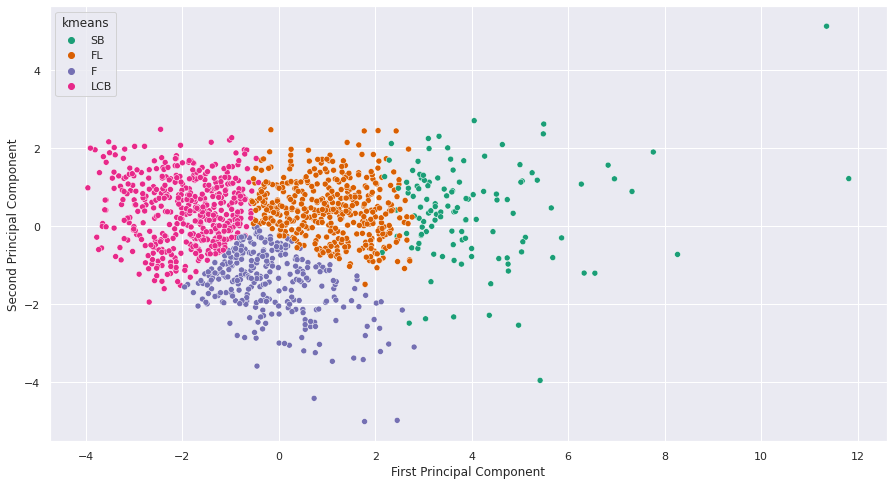

array([ True,  True,  True,  True,  True,  True,  True])

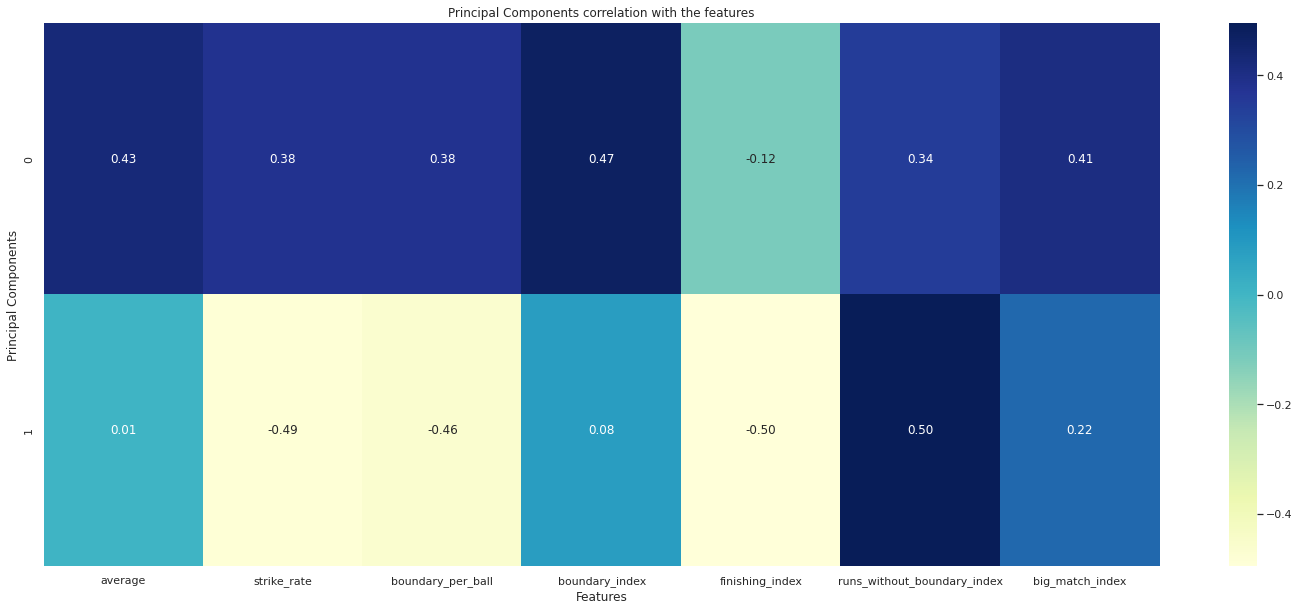

In [92]:
pca = PCA(n_components=2)

pca.fit(batter_for_clustering_scaled)

x_pca = pca.transform(batter_for_clustering_scaled)

print(batter_for_clustering_scaled.shape)

print(x_pca.shape)

fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=results['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'}),palette='Dark2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

df = pd.DataFrame(pca.components_ , columns=columns)

fig = plt.figure(figsize=(25, 10))
sns.heatmap(df,cmap='YlGnBu',annot=True,fmt=".2f")
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.5)
selector.fit_transform(batter_for_clustering_scaled)

selector.get_support()

In [93]:
pca.explained_variance_

array([4.02851588, 1.29694627])

In [94]:
pca.explained_variance_ratio_

array([0.57506025, 0.18513574])

In [95]:
dict_pca = dict(zip(columns,np.round(pca.components_[0],3)))
dict_pca

{'average': 0.429,
 'strike_rate': 0.381,
 'boundary_per_ball': 0.38,
 'boundary_index': 0.475,
 'finishing_index': -0.115,
 'runs_without_boundary_index': 0.345,
 'big_match_index': 0.41}

In [96]:
final_index['pca_score'] = 0
for i in columns:
  final_index['pca_score'] = np.round(final_index['pca_score'] + (final_index[i] * dict_pca.get(i)),3)

In [97]:
final_index[final_index.country.isin(top10countries)].sort_values('pca_score',ascending = False).head(10).drop(['rfc_score','xgb_score','voting_score','rbml_score'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,pca_score
318,ML Hayden,AUS,3.140,1.232,1.911,3.142,0.655,0.626,4.114,3,5.862
5,Babar Azam,PAK,2.575,0.719,0.520,2.388,-0.349,3.512,3.713,3,5.485
2,V Kohli,INDIA,3.157,1.011,0.676,2.178,0.377,3.018,2.984,3,5.252
20,KL Rahul,INDIA,2.104,1.181,1.042,2.323,-0.402,2.080,3.491,3,5.047
58,DJ Malan,ENG,2.164,0.994,1.094,2.545,-0.359,1.956,3.343,3,5.019
30,Mohammad Rizwan,PAK,3.046,0.698,0.520,2.211,0.302,2.924,2.942,3,5.001
420,MN van Wyk,SA,1.794,1.210,1.494,2.451,-0.359,0.676,3.956,3,4.859
271,SA Yadav,INDIA,1.940,1.998,2.102,2.138,0.212,0.474,2.942,3,4.754
148,DP Conway,NZ,3.026,1.070,0.937,2.299,0.447,2.469,1.906,3,4.736
284,A Symonds,AUS,2.830,2.132,1.598,1.790,0.820,1.795,1.347,3,4.560


In [98]:
train_index = final_index[['name','country','kmeans','rfc_score','xgb_score','voting_score','rbml_score','pca_score']][final_index.country.isin(top10countries)]

In [99]:
train_index['kmeans_role'] = train_index['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'})

In [100]:
train_index.drop('kmeans',axis=1)[(train_index.country.isin(top10countries)) & (train_index['kmeans_role']=='SB')].sort_values('rbml_score',ascending=False).head(10)

,name,country,rfc_score,xgb_score,voting_score,rbml_score,pca_score,kmeans_role
318,ML Hayden,AUS,2.193,2.248,2.224,2.903,5.862,SB
5,Babar Azam,PAK,1.859,1.999,1.987,2.569,5.485,SB
2,V Kohli,INDIA,1.914,1.950,1.971,2.494,5.252,SB
30,Mohammad Rizwan,PAK,1.805,1.833,1.858,2.421,5.001,SB
58,DJ Malan,ENG,1.752,1.867,1.849,2.324,5.019,SB
20,KL Rahul,INDIA,1.738,1.894,1.857,2.310,5.047,SB
420,MN van Wyk,SA,1.667,1.856,1.782,2.285,4.859,SB
148,DP Conway,NZ,1.825,1.755,1.823,2.193,4.736,SB
271,SA Yadav,INDIA,1.791,1.894,1.844,2.080,4.754,SB
284,A Symonds,AUS,1.869,1.803,1.849,1.939,4.560,SB


In [101]:
train_index.drop('kmeans',axis=1)[(train_index.country.isin(top10countries)) & (train_index['kmeans_role']=='LCB')].sort_values('rbml_score').head(10)

,name,country,rfc_score,xgb_score,voting_score,rbml_score,pca_score,kmeans_role
1293,VD Philander,SA,-1.523,-1.447,-1.472,-1.786,-3.388,LCB
1229,Shapoor Zadran,AFG,-1.308,-1.339,-1.365,-1.684,-3.655,LCB
1289,R Rampaul,WI,-1.199,-1.209,-1.223,-1.622,-3.771,LCB
1117,Abdur Razzak,BAN,-1.280,-1.253,-1.280,-1.603,-3.648,LCB
1259,Rubel Hossain,BAN,-1.196,-1.196,-1.226,-1.541,-3.731,LCB
1098,S Badree,WI,-1.047,-1.044,-1.066,-1.323,-3.292,LCB
1265,SS Cottrell,WI,-1.044,-1.066,-1.100,-1.296,-3.265,LCB
1253,MR Gillespie,NZ,-0.995,-0.973,-0.986,-1.283,-3.203,LCB
1247,Shafiul Islam,BAN,-1.132,-1.095,-1.129,-1.245,-2.777,LCB
1269,D Bishoo,WI,-0.947,-1.000,-1.014,-1.239,-2.844,LCB


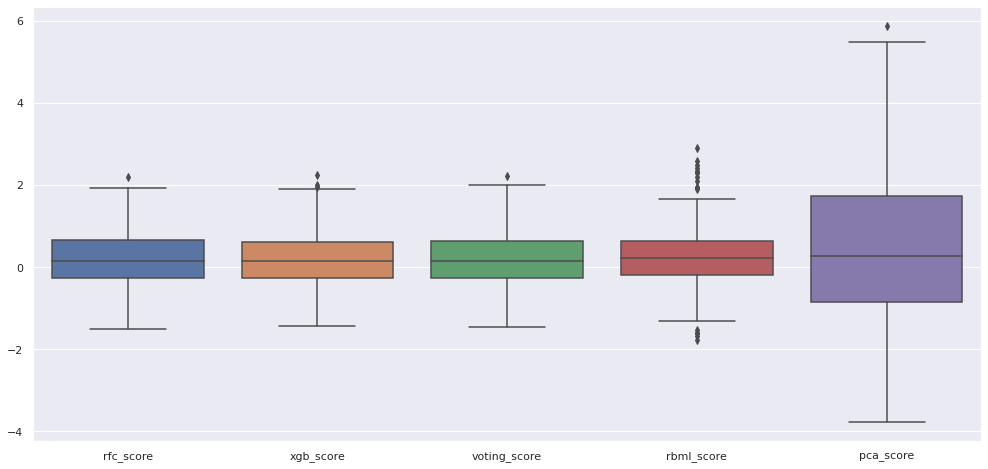

In [102]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=train_index[['rfc_score','xgb_score','voting_score','rbml_score','pca_score']])
plt.show()

# Training Evaluation

In [103]:
from pathlib import Path

In [104]:
final_training_evaluation = batter.copy()

In [105]:
final_training_evaluation = pd.merge(final_training_evaluation,final_index[['name','country','kmeans','rbml_score','pca_score']],on=['name','country'],how='left')

In [106]:
final_training_evaluation

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,rbml_score,pca_score
0,RG Sharma,INDIA,32.48,139.55,0.189,3.829,0.128,10.350,0.291,45.326,Best,3,1.605,3.632
1,MJ Guptill,NZ,32.66,136.71,0.187,4.185,0.065,10.750,0.222,44.649,Best,3,1.491,3.506
2,V Kohli,INDIA,51.50,137.67,0.163,4.382,0.281,17.438,0.337,70.900,Best,3,2.494,5.252
3,PR Stirling,IRE,29.84,134.69,0.201,4.109,0.079,9.149,0.218,40.191,Best,3,1.365,3.240
4,AJ Finch,AUS,34.69,144.87,0.204,4.337,0.112,10.910,0.225,50.255,Best,3,1.629,3.872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,H Helva,TKY,3.00,48.00,0.080,0.500,0.000,1.000,0.000,1.440,Poor,1,-1.517,-2.960
1298,Apon Mustafizur,SRB,2.75,29.72,0.054,0.500,0.000,0.750,0.000,0.817,Poor,1,-1.863,-3.414
1299,W Uisuk,THAI,2.75,27.50,0.025,0.250,0.000,1.750,0.000,0.756,Poor,1,-2.010,-3.634
1300,I Katzarski,BUL,2.25,32.14,0.000,0.000,0.000,2.250,0.000,0.723,Poor,1,-2.067,-3.805


## Analysis

In [107]:
final_training_evaluation['kmeans_role'] = final_training_evaluation['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'})

In [108]:
cols_final = final_training_evaluation.columns.tolist()
cols_final = ['name','country','average','strike_rate','boundary_per_ball','boundary_index','finishing_index','runs_without_boundary_index','big_match_index','prelim_metric','pre-rank','kmeans','kmeans_role', 'rbml_score','pca_score']

In [109]:
final_training_evaluation = final_training_evaluation[cols_final]

In [110]:
final_training_evaluation[(final_training_evaluation.kmeans == 3)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
361,Zeeshan Kukikhel,HUN,65.75,175.33,0.313,11.750,0.000,13.750,0.750,115.279,Good,3,SB,5.548,11.816
343,Azhar Andani,PORT,69.00,154.18,0.184,8.250,0.000,33.000,0.750,106.384,Good,3,SB,5.217,11.357
478,M Spoors,CAN,64.66,137.58,0.206,5.800,0.400,13.600,0.600,88.959,Good,3,SB,3.785,7.323
138,Taranjeet Singh,ROM,52.75,182.42,0.314,7.786,0.143,9.786,0.500,96.227,Best,3,SB,3.697,8.266
369,Saim Hussain,BUL,51.40,161.63,0.201,5.333,0.167,18.167,0.667,83.078,Good,3,SB,3.654,7.765
184,Muhammad Waseem,UAE,46.00,153.33,0.218,6.000,0.083,12.833,0.583,70.532,Best,3,SB,3.282,6.959
440,LA Dunbar,SRB,53.50,168.50,0.268,5.667,0.333,6.667,0.500,90.148,Good,3,SB,3.163,6.554
376,Dylan Steyn,CZK-R,42.00,152.72,0.224,6.167,0.000,15.333,0.500,64.142,Good,3,SB,3.045,6.827
318,ML Hayden,AUS,51.33,143.92,0.234,5.556,0.333,9.111,0.444,73.874,Good,3,SB,2.903,5.862
102,S Davizi,CZK-R,45.82,149.23,0.215,5.895,0.105,14.368,0.421,68.377,Best,3,SB,2.855,6.273


In [111]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 3)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
318,ML Hayden,AUS,51.33,143.92,0.234,5.556,0.333,9.111,0.444,73.874,Good,3,SB,2.903,5.862
5,Babar Azam,PAK,45.52,129.44,0.154,4.638,0.145,19.159,0.406,58.921,Best,3,SB,2.569,5.485
2,V Kohli,INDIA,51.50,137.67,0.163,4.382,0.281,17.438,0.337,70.900,Best,3,SB,2.494,5.252
30,Mohammad Rizwan,PAK,50.36,128.83,0.154,4.422,0.267,17.111,0.333,64.879,Best,3,SB,2.421,5.001
58,DJ Malan,ENG,41.30,137.20,0.187,4.829,0.143,13.743,0.371,56.664,Best,3,SB,2.324,5.019
20,KL Rahul,INDIA,40.68,142.49,0.184,4.558,0.135,14.173,0.385,57.965,Best,3,SB,2.310,5.047
420,MN van Wyk,SA,37.50,143.31,0.210,4.714,0.143,9.286,0.429,53.741,Good,3,SB,2.285,4.859
148,DP Conway,NZ,50.16,139.35,0.178,4.529,0.294,15.529,0.235,69.898,Best,3,SB,2.193,4.736
271,SA Yadav,INDIA,39.00,165.56,0.245,4.333,0.250,8.583,0.333,64.568,Good,3,SB,2.080,4.754
284,A Symonds,AUS,48.14,169.34,0.216,3.909,0.364,13.182,0.182,81.520,Good,3,SB,1.939,4.560


In [112]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 2)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
876,SC Kuggeleijn,NZ,19.75,213.51,0.324,1.500,0.500,2.125,0.000,42.168,Poor,2,F,1.307,1.778
591,R Shepherd,WI,48.66,155.31,0.202,3.167,0.500,7.333,0.000,75.574,Good,2,F,1.222,2.560
631,VR Iyer,INDIA,33.25,162.19,0.244,2.857,0.429,6.143,0.000,53.928,Good,2,F,1.110,2.091
922,DR Sams,AUS,24.00,189.47,0.263,2.000,0.400,4.800,0.000,45.473,Poor,2,F,1.097,1.750
1002,Abu Hider,BAN,58.00,134.88,0.209,1.800,0.800,2.800,0.000,78.230,Poor,2,F,1.020,1.552
938,SN Thakur,INDIA,23.00,181.57,0.237,1.500,0.500,4.167,0.000,41.761,Poor,2,F,0.946,1.110
643,Hasan Ali,PAK,16.12,192.53,0.269,1.000,0.556,1.944,0.000,31.036,Good,2,F,0.939,0.732
241,KD Karthik,INDIA,33.25,143.52,0.205,2.192,0.538,5.423,0.000,47.720,Good,2,F,0.832,1.184
540,D Pretorius,SA,24.28,161.90,0.200,1.909,0.364,6.364,0.091,39.309,Good,2,F,0.802,1.510
1120,KA Jamieson,NZ,20.50,151.85,0.259,1.750,0.500,3.250,0.000,31.129,Poor,2,F,0.750,0.756


In [113]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 0)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
516,JP Inglis,AUS,35.80,145.52,0.171,3.500,0.167,14.833,0.000,52.096,Good,0,FL,1.167,2.765
116,MK Pandey,INDIA,44.31,126.15,0.121,2.061,0.515,12.091,0.091,55.897,Best,0,FL,1.015,1.874
50,KC Sangakkara,SL,31.40,119.55,0.138,3.000,0.170,13.321,0.151,37.539,Best,0,FL,0.983,2.319
90,MR Marsh,AUS,31.60,125.00,0.148,3.000,0.200,11.286,0.171,39.500,Best,0,FL,0.948,2.332
267,Anamul Haque,BAN,32.27,117.94,0.166,3.846,0.154,10.077,0.077,38.059,Good,0,FL,0.945,2.218
23,S Dhawan,INDIA,27.92,126.36,0.173,3.652,0.045,10.530,0.167,35.280,Best,0,FL,0.944,2.620
83,G Gambhir,INDIA,27.41,119.02,0.152,3.306,0.056,12.111,0.194,32.623,Best,0,FL,0.936,2.494
390,UT Khawaja,AUS,26.77,132.41,0.198,4.000,0.000,9.667,0.111,35.446,Good,0,FL,0.910,2.654
69,RR Hendricks,SA,26.89,121.55,0.159,3.425,0.025,11.675,0.175,32.685,Best,0,FL,0.905,2.493
19,TM Dilshan,SL,28.19,120.54,0.163,3.241,0.152,10.114,0.190,33.980,Best,0,FL,0.890,2.319


In [114]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 1)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
474,Fawad Alam,PAK,17.63,114.79,0.083,0.824,0.353,7.294,0.0,20.237,Good,1,LCB,-0.193,-0.896
1104,SE Rutherford,WI,10.75,119.44,0.111,1.000,0.000,5.250,0.0,12.840,Poor,1,LCB,-0.195,-0.854
463,Mosaddek Hossain,BAN,20.00,105.82,0.090,1.133,0.333,8.000,0.0,21.164,Good,1,LCB,-0.207,-0.669
994,DR Flynn,NZ,11.80,115.68,0.098,1.000,0.000,6.200,0.0,13.650,Poor,1,LCB,-0.260,-0.852
564,JP Faulkner,AUS,14.45,115.21,0.087,0.667,0.389,5.611,0.0,16.648,Average,1,LCB,-0.263,-1.247
399,Nurul Hasan,BAN,12.47,112.32,0.104,0.846,0.269,5.423,0.0,14.006,Average,1,LCB,-0.268,-1.132
538,GD Elliott,NZ,15.54,108.91,0.089,0.933,0.267,7.400,0.0,16.925,Average,1,LCB,-0.280,-0.918
404,AT Carey,AUS,11.09,108.37,0.121,1.000,0.192,4.423,0.0,12.018,Average,1,LCB,-0.292,-1.122
862,TD Paine,AUS,10.25,106.49,0.130,1.111,0.111,4.000,0.0,10.915,Poor,1,LCB,-0.301,-1.071
525,LPC Silva,SL,13.46,98.87,0.124,1.467,0.133,5.400,0.0,13.308,Average,1,LCB,-0.306,-0.816


In [115]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries))].sort_values('pca_score',ascending = False).drop(['rbml_score','kmeans'],axis=1).head(15)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans_role,pca_score
318,ML Hayden,AUS,51.33,143.92,0.234,5.556,0.333,9.111,0.444,73.874,Good,SB,5.862
5,Babar Azam,PAK,45.52,129.44,0.154,4.638,0.145,19.159,0.406,58.921,Best,SB,5.485
2,V Kohli,INDIA,51.50,137.67,0.163,4.382,0.281,17.438,0.337,70.900,Best,SB,5.252
20,KL Rahul,INDIA,40.68,142.49,0.184,4.558,0.135,14.173,0.385,57.965,Best,SB,5.047
58,DJ Malan,ENG,41.30,137.20,0.187,4.829,0.143,13.743,0.371,56.664,Best,SB,5.019
30,Mohammad Rizwan,PAK,50.36,128.83,0.154,4.422,0.267,17.111,0.333,64.879,Best,SB,5.001
420,MN van Wyk,SA,37.50,143.31,0.210,4.714,0.143,9.286,0.429,53.741,Good,SB,4.859
271,SA Yadav,INDIA,39.00,165.56,0.245,4.333,0.250,8.583,0.333,64.568,Good,SB,4.754
148,DP Conway,NZ,50.16,139.35,0.178,4.529,0.294,15.529,0.235,69.898,Best,SB,4.736
284,A Symonds,AUS,48.14,169.34,0.216,3.909,0.364,13.182,0.182,81.520,Good,SB,4.560


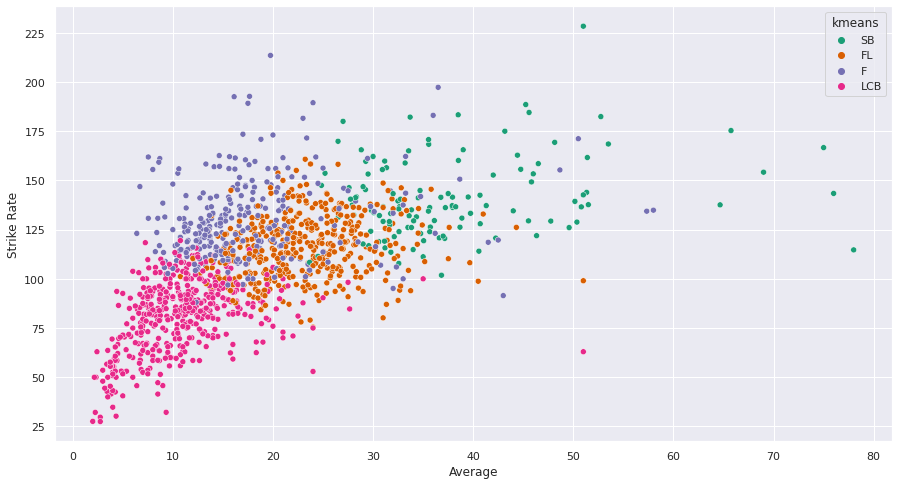

In [116]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x='average', y='strike_rate',data=final_training_evaluation,hue=results['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'}),palette='Dark2')
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.show()

In [117]:
filepath_batter_evaluation_train = Path('final_training_evaluation_batter.csv') 
final_training_evaluation.drop('kmeans',axis=1).to_csv(filepath_batter_evaluation_train,index=False)

# Test Evaluation

In [118]:
batter_test = pd.read_csv('/content/drive/MyDrive/Diss/Code/CSV/batter_test.csv')

In [119]:
 batter_test

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank
0,B Mavuta,ZIM,17.66,147.22,0.167,0.857,0.571,3.286,0.000,25.999,Poor
1,NJ Maddinson,AUS,11.25,128.57,0.200,1.750,0.000,3.750,0.000,14.464,Poor
2,JW Dernbach,ENG/ITA,5.16,96.87,0.125,0.400,0.400,1.500,0.000,4.998,Poor
3,Taskin Ahmed,BAN,9.71,93.15,0.110,0.533,0.533,2.133,0.000,9.045,Poor
4,GJ Maxwell,AUS,30.96,154.00,0.203,3.390,0.169,9.662,0.195,47.678,Best
...,...,...,...,...,...,...,...,...,...,...,...
93,Nasir Hossain,BAN,18.50,113.49,0.113,1.542,0.167,8.667,0.083,20.996,Good
94,LJ Wright,ENG,18.97,137.00,0.179,2.200,0.111,6.689,0.089,25.989,Good
95,Faisal Javed,QAT,22.00,155.66,0.264,3.733,0.000,5.600,0.133,34.245,Good
96,D Uwimana,RWN,23.50,68.11,0.072,1.000,0.600,5.400,0.000,16.006,Poor


In [120]:
batter_test['pre-rank'].value_counts()

Poor       50
Good       29
Best       10
Average     9
Name: pre-rank, dtype: int64

In [121]:
batter_test_for_clustering = batter_test.copy().drop(['name','country','prelim_metric','pre-rank'],axis=1)
batter_test_for_clustering

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,17.66,147.22,0.167,0.857,0.571,3.286,0.000
1,11.25,128.57,0.200,1.750,0.000,3.750,0.000
2,5.16,96.87,0.125,0.400,0.400,1.500,0.000
3,9.71,93.15,0.110,0.533,0.533,2.133,0.000
4,30.96,154.00,0.203,3.390,0.169,9.662,0.195
...,...,...,...,...,...,...,...
93,18.50,113.49,0.113,1.542,0.167,8.667,0.083
94,18.97,137.00,0.179,2.200,0.111,6.689,0.089
95,22.00,155.66,0.264,3.733,0.000,5.600,0.133
96,23.50,68.11,0.072,1.000,0.600,5.400,0.000


In [122]:
scaler = StandardScaler()
batter_test_for_clustering_scaled= scaler.fit_transform(batter_test_for_clustering)

In [123]:
batter_test_for_clustering_scaled = pd.DataFrame(batter_test_for_clustering_scaled,columns = columns)
batter_test_for_clustering_scaled

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,0.006278,1.263624,0.647861,-0.644028,1.774903,-0.951211,-0.561409
1,-0.677181,0.621015,1.204793,0.115049,-1.180434,-0.799427,-0.561409
2,-1.326520,-0.471249,-0.060963,-1.032492,0.889854,-1.535449,-0.561409
3,-0.841382,-0.599427,-0.314114,-0.919438,1.578225,-1.328382,-0.561409
4,1.424375,1.497238,1.255424,1.509099,-0.305737,1.134512,1.663504
...,...,...,...,...,...,...,...
93,0.095842,0.101414,-0.263484,-0.061757,-0.316089,0.809027,0.385605
94,0.145955,0.911481,0.850382,0.497563,-0.605929,0.161982,0.454064
95,0.469025,1.554435,2.284905,1.800660,-1.180434,-0.194253,0.956096
96,0.628961,-1.462212,-0.955431,-0.522474,1.924999,-0.259677,-0.561409


In [124]:
batter_test_scaled = batter_test_for_clustering_scaled.copy()
batter_test_scaled['name'] = batter_test['name']
batter_test_scaled['country'] = batter_test['country']

cols = batter_test_scaled.columns.tolist()
cols = cols[-2:] + cols[:-2]


batter_test_scaled = batter_test_scaled [cols]
batter_test_scaled

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,B Mavuta,ZIM,0.006278,1.263624,0.647861,-0.644028,1.774903,-0.951211,-0.561409
1,NJ Maddinson,AUS,-0.677181,0.621015,1.204793,0.115049,-1.180434,-0.799427,-0.561409
2,JW Dernbach,ENG/ITA,-1.326520,-0.471249,-0.060963,-1.032492,0.889854,-1.535449,-0.561409
3,Taskin Ahmed,BAN,-0.841382,-0.599427,-0.314114,-0.919438,1.578225,-1.328382,-0.561409
4,GJ Maxwell,AUS,1.424375,1.497238,1.255424,1.509099,-0.305737,1.134512,1.663504
...,...,...,...,...,...,...,...,...,...
93,Nasir Hossain,BAN,0.095842,0.101414,-0.263484,-0.061757,-0.316089,0.809027,0.385605
94,LJ Wright,ENG,0.145955,0.911481,0.850382,0.497563,-0.605929,0.161982,0.454064
95,Faisal Javed,QAT,0.469025,1.554435,2.284905,1.800660,-1.180434,-0.194253,0.956096
96,D Uwimana,RWN,0.628961,-1.462212,-0.955431,-0.522474,1.924999,-0.259677,-0.561409


In [125]:
ypred_test = kmodel.predict(batter_test_for_clustering_scaled)
results_test = batter_test_scaled
results_test['kmeans'] = ypred_test

In [126]:
results_mid = results_test.copy()
final_test_index = results_test.copy()
middle_ovr = pd.DataFrame()


In [127]:
results_0 = results_mid[results_mid['kmeans'] == 0]
results_1 = results_mid[results_mid['kmeans'] == 1]
results_2 = results_mid[results_mid['kmeans'] == 2]
results_3 = results_mid[results_mid['kmeans'] == 3]

### For 0

In [128]:
results_0['rbml_score'] = 0
for i in columns:
  results_0['rbml_score'] = np.round(results_0['rbml_score'] + (results_0[i] * dict_0.get(i)),3)

In [129]:
middle_ovr = results_0.copy()

### For 1


In [130]:
results_1['rbml_score'] = 0
for i in columns:
  results_1['rbml_score'] = np.round(results_1['rbml_score'] + (results_1[i] * dict_1.get(i)),3)

In [131]:
middle_ovr = middle_ovr.append(results_1)

### For 2


In [132]:
results_2['rbml_score'] = 0
for i in columns:
  results_2['rbml_score'] = np.round(results_2['rbml_score'] + (results_2[i] * dict_2.get(i)),3)

In [133]:
middle_ovr = middle_ovr.append(results_2)

### For 3

In [134]:
results_3['rbml_score'] = 0
for i in columns:
  results_3['rbml_score'] = np.round(results_3['rbml_score'] + (results_3[i] * dict_3.get(i)),3)

In [135]:
middle_ovr = middle_ovr.append(results_3)

In [136]:
middle_ovr

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rbml_score
14,DAS Gunaratne,SL,0.788897,0.546245,0.192188,0.398109,0.113496,1.054368,1.344029,0,0.671
19,Rohan Mustafa,UAE,0.354938,0.371551,0.597230,0.844375,-0.776728,0.526722,0.328556,0,0.429
27,Imran Ali Butt,BHR,0.031867,-0.528447,-0.550389,0.157551,-1.180434,0.950670,1.720553,0,0.241
28,Mohammad Hafeez,PAK,0.944568,0.395671,0.512847,1.201388,-0.559348,1.166243,0.921866,0,0.837
30,Rizwan Mahmood,DEN,0.103305,0.498006,-0.060963,0.008795,-0.533469,0.754398,-0.561409,0,0.073
...,...,...,...,...,...,...,...,...,...,...,...
72,ED Silva,KUW,0.184340,2.637396,3.280634,0.752572,0.113496,-1.208328,2.291043,3,1.079
83,NG Collins,FIN,1.215392,-0.385109,-0.601019,0.752572,-0.750849,3.289585,2.291043,3,1.280
84,R Pathan,CAN,3.608032,1.749458,1.879863,3.959737,-0.238453,2.285978,4.630055,3,3.505
86,Usman Patel,KUW,0.504211,0.313320,1.137286,1.299142,-0.440306,0.123381,2.701797,3,1.216


In [137]:
final_test_index = pd.merge(final_test_index,middle_ovr[['name','country','rbml_score']],on=['name','country'],how='left')

In [138]:
final_test_index

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rbml_score
0,B Mavuta,ZIM,0.006278,1.263624,0.647861,-0.644028,1.774903,-0.951211,-0.561409,2,0.363
1,NJ Maddinson,AUS,-0.677181,0.621015,1.204793,0.115049,-1.180434,-0.799427,-0.561409,2,-0.067
2,JW Dernbach,ENG/ITA,-1.326520,-0.471249,-0.060963,-1.032492,0.889854,-1.535449,-0.561409,1,-0.633
3,Taskin Ahmed,BAN,-0.841382,-0.599427,-0.314114,-0.919438,1.578225,-1.328382,-0.561409,1,-0.612
4,GJ Maxwell,AUS,1.424375,1.497238,1.255424,1.509099,-0.305737,1.134512,1.663504,3,1.427
...,...,...,...,...,...,...,...,...,...,...,...
93,Nasir Hossain,BAN,0.095842,0.101414,-0.263484,-0.061757,-0.316089,0.809027,0.385605,0,0.155
94,LJ Wright,ENG,0.145955,0.911481,0.850382,0.497563,-0.605929,0.161982,0.454064,0,0.320
95,Faisal Javed,QAT,0.469025,1.554435,2.284905,1.800660,-1.180434,-0.194253,0.956096,3,0.995
96,D Uwimana,RWN,0.628961,-1.462212,-0.955431,-0.522474,1.924999,-0.259677,-0.561409,1,-0.714


### PCA Metric

In [139]:
final_test_index['pca_score'] = 0
for i in columns:
  final_test_index['pca_score'] = np.round(final_test_index['pca_score'] + (final_test_index[i] * dict_pca.get(i)),3)

In [140]:
final_test_index

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,kmeans,rbml_score,pca_score
0,B Mavuta,ZIM,0.006278,1.263624,0.647861,-0.644028,1.774903,-0.951211,-0.561409,2,0.363,-0.338
1,NJ Maddinson,AUS,-0.677181,0.621015,1.204793,0.115049,-1.180434,-0.799427,-0.561409,2,-0.067,0.089
2,JW Dernbach,ENG/ITA,-1.326520,-0.471249,-0.060963,-1.032492,0.889854,-1.535449,-0.561409,1,-0.633,-2.124
3,Taskin Ahmed,BAN,-0.841382,-0.599427,-0.314114,-0.919438,1.578225,-1.328382,-0.561409,1,-0.612,-2.014
4,GJ Maxwell,AUS,1.424375,1.497238,1.255424,1.509099,-0.305737,1.134512,1.663504,3,1.427,3.483
...,...,...,...,...,...,...,...,...,...,...,...,...
93,Nasir Hossain,BAN,0.095842,0.101414,-0.263484,-0.061757,-0.316089,0.809027,0.385605,0,0.155,0.424
94,LJ Wright,ENG,0.145955,0.911481,0.850382,0.497563,-0.605929,0.161982,0.454064,0,0.320,1.281
95,Faisal Javed,QAT,0.469025,1.554435,2.284905,1.800660,-1.180434,-0.194253,0.956096,3,0.995,2.977
96,D Uwimana,RWN,0.628961,-1.462212,-0.955431,-0.522474,1.924999,-0.259677,-0.561409,1,-0.714,-1.439


# Test Evaluation Final

In [141]:
final_evaluation_index = batter_test.copy()

In [142]:
final_evaluation_index = pd.merge(final_evaluation_index,final_test_index[['name','country','kmeans','rbml_score','pca_score']],on=['name','country'],how='left')

In [143]:
final_evaluation_index

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,rbml_score,pca_score
0,B Mavuta,ZIM,17.66,147.22,0.167,0.857,0.571,3.286,0.000,25.999,Poor,2,0.363,-0.338
1,NJ Maddinson,AUS,11.25,128.57,0.200,1.750,0.000,3.750,0.000,14.464,Poor,2,-0.067,0.089
2,JW Dernbach,ENG/ITA,5.16,96.87,0.125,0.400,0.400,1.500,0.000,4.998,Poor,1,-0.633,-2.124
3,Taskin Ahmed,BAN,9.71,93.15,0.110,0.533,0.533,2.133,0.000,9.045,Poor,1,-0.612,-2.014
4,GJ Maxwell,AUS,30.96,154.00,0.203,3.390,0.169,9.662,0.195,47.678,Best,3,1.427,3.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Nasir Hossain,BAN,18.50,113.49,0.113,1.542,0.167,8.667,0.083,20.996,Good,0,0.155,0.424
94,LJ Wright,ENG,18.97,137.00,0.179,2.200,0.111,6.689,0.089,25.989,Good,0,0.320,1.281
95,Faisal Javed,QAT,22.00,155.66,0.264,3.733,0.000,5.600,0.133,34.245,Good,3,0.995,2.977
96,D Uwimana,RWN,23.50,68.11,0.072,1.000,0.600,5.400,0.000,16.006,Poor,1,-0.714,-1.439


In [144]:
final_evaluation_index['kmeans_role'] = final_evaluation_index['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'})
final_evaluation_index = final_evaluation_index[cols_final]

In [145]:
final_evaluation_index[final_evaluation_index['pre-rank'] == 'Best']

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
4,GJ Maxwell,AUS,30.96,154.00,0.203,3.390,0.169,9.662,0.195,47.678,Best,3,SB,1.427,3.483
22,AK Markram,SA,39.20,147.00,0.182,4.056,0.167,13.333,0.333,57.624,Best,3,SB,2.259,4.965
24,TP Ura,PNG,36.38,148.27,0.191,3.812,0.188,11.125,0.281,53.941,Best,3,SB,1.932,4.306
28,Mohammad Hafeez,PAK,26.46,122.03,0.159,3.028,0.120,9.759,0.130,32.289,Best,0,FL,0.837,2.166
45,Sarfaraz Ahmed,PAK,27.26,125.26,0.144,2.238,0.286,9.810,0.071,34.146,Best,0,FL,0.658,1.462
63,Virandeep Singh,MAL,29.62,113.79,0.144,3.483,0.069,11.862,0.138,33.705,Best,0,FL,1.074,2.596
66,Salman Butt,PAK,28.33,107.98,0.138,3.304,0.087,11.783,0.130,30.591,Best,0,FL,0.979,2.292
67,Hazratullah Zazai,AFG,36.35,145.40,0.224,5.091,0.091,8.045,0.227,52.853,Best,3,SB,1.970,4.455
75,N Vanua,PNG,23.00,150.59,0.173,1.871,0.290,6.581,0.065,34.636,Best,2,F,0.580,1.243
90,F Behardien,SA,32.37,128.21,0.131,1.767,0.467,9.133,0.033,41.502,Best,0,FL,0.629,1.099


In [146]:
final_evaluation_index.sort_values('rbml_score',ascending=False)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
84,R Pathan,CAN,51.44,161.32,0.240,6.273,0.182,13.182,0.455,82.983,Good,3,SB,3.505,7.524
22,AK Markram,SA,39.20,147.00,0.182,4.056,0.167,13.333,0.333,57.624,Best,3,SB,2.259,4.965
67,Hazratullah Zazai,AFG,36.35,145.40,0.224,5.091,0.091,8.045,0.227,52.853,Best,3,SB,1.970,4.455
24,TP Ura,PNG,36.38,148.27,0.191,3.812,0.188,11.125,0.281,53.941,Best,3,SB,1.932,4.306
11,JM Kemp,SA,50.75,126.87,0.169,3.857,0.429,10.714,0.143,64.387,Good,3,SB,1.907,3.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,RA Bhatti,CAN,8.33,67.56,0.027,0.250,0.250,5.250,0.000,5.628,Poor,1,LCB,-1.273,-2.541
53,PADLR Sandakan,SL,7.66,60.52,0.053,0.286,0.571,2.143,0.000,4.636,Poor,1,LCB,-1.295,-3.024
87,D Gim,NGA,7.45,61.19,0.022,0.231,0.154,5.231,0.000,4.559,Poor,1,LCB,-1.404,-2.650
76,AG Cremer,ZIM,5.23,66.66,0.020,0.105,0.316,3.158,0.000,3.486,Poor,1,LCB,-1.407,-3.074


In [147]:
final_evaluation_index['kmeans_role'].value_counts()

LCB    39
FL     29
F      19
SB     11
Name: kmeans_role, dtype: int64

In [148]:
final_evaluation_index.sort_values('rbml_score',ascending=False)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
84,R Pathan,CAN,51.44,161.32,0.240,6.273,0.182,13.182,0.455,82.983,Good,3,SB,3.505,7.524
22,AK Markram,SA,39.20,147.00,0.182,4.056,0.167,13.333,0.333,57.624,Best,3,SB,2.259,4.965
67,Hazratullah Zazai,AFG,36.35,145.40,0.224,5.091,0.091,8.045,0.227,52.853,Best,3,SB,1.970,4.455
24,TP Ura,PNG,36.38,148.27,0.191,3.812,0.188,11.125,0.281,53.941,Best,3,SB,1.932,4.306
11,JM Kemp,SA,50.75,126.87,0.169,3.857,0.429,10.714,0.143,64.387,Good,3,SB,1.907,3.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,RA Bhatti,CAN,8.33,67.56,0.027,0.250,0.250,5.250,0.000,5.628,Poor,1,LCB,-1.273,-2.541
53,PADLR Sandakan,SL,7.66,60.52,0.053,0.286,0.571,2.143,0.000,4.636,Poor,1,LCB,-1.295,-3.024
87,D Gim,NGA,7.45,61.19,0.022,0.231,0.154,5.231,0.000,4.559,Poor,1,LCB,-1.404,-2.650
76,AG Cremer,ZIM,5.23,66.66,0.020,0.105,0.316,3.158,0.000,3.486,Poor,1,LCB,-1.407,-3.074


In [149]:
final_evaluation_index[final_evaluation_index.country.isin(top10countries)]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
1,NJ Maddinson,AUS,11.25,128.57,0.200,1.750,0.000,3.750,0.000,14.464,Poor,2,F,-0.067,0.089
3,Taskin Ahmed,BAN,9.71,93.15,0.110,0.533,0.533,2.133,0.000,9.045,Poor,1,LCB,-0.612,-2.014
4,GJ Maxwell,AUS,30.96,154.00,0.203,3.390,0.169,9.662,0.195,47.678,Best,3,SB,1.427,3.483
8,LE Plunkett,ENG,6.00,123.52,0.118,0.364,0.364,2.182,0.000,7.411,Poor,2,F,-0.348,-1.698
11,JM Kemp,SA,50.75,126.87,0.169,3.857,0.429,10.714,0.143,64.387,Good,3,SB,1.907,3.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,SW Billings,ENG,17.07,129.89,0.155,1.727,0.152,6.606,0.061,22.172,Good,0,FL,0.102,0.591
90,F Behardien,SA,32.37,128.21,0.131,1.767,0.467,9.133,0.033,41.502,Best,0,FL,0.629,1.099
93,Nasir Hossain,BAN,18.50,113.49,0.113,1.542,0.167,8.667,0.083,20.996,Good,0,FL,0.155,0.424
94,LJ Wright,ENG,18.97,137.00,0.179,2.200,0.111,6.689,0.089,25.989,Good,0,FL,0.320,1.281


In [150]:
final_evaluation_index[(final_evaluation_index['kmeans_role']=='LCB') & (final_evaluation_index['pre-rank']!='Poor')]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
15,JN Loftie-Eaton,NAM,12.00,97.95,0.095,1.000,0.143,6.143,0.0,11.754,Average,1,LCB,-0.481,-1.070
42,A Shreshta,NGA,13.75,85.49,0.083,1.333,0.000,7.917,0.0,11.755,Average,1,LCB,-0.601,-0.812
44,HR Walsh,USA/WI,14.00,97.90,0.091,0.867,0.333,5.333,0.0,13.706,Average,1,LCB,-0.467,-1.263
54,AC Agar,AUS,12.59,101.83,0.103,1.037,0.185,5.444,0.0,12.820,Average,1,LCB,-0.394,-1.029
70,Ahmed Raza,UAE,12.20,82.99,0.054,0.400,0.500,4.000,0.0,10.125,Average,1,LCB,-0.884,-2.218
80,AC Botha,IRE,13.00,92.19,0.092,1.182,0.091,6.909,0.0,11.985,Average,1,LCB,-0.519,-0.928
85,K Doriga,PNG,13.07,106.39,0.070,0.750,0.125,7.688,0.0,13.905,Average,1,LCB,-0.445,-0.987


In [151]:
final_evaluation_index[(final_evaluation_index['pre-rank']=='Best')].drop('kmeans',axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans_role,rbml_score,pca_score
4,GJ Maxwell,AUS,30.96,154.00,0.203,3.390,0.169,9.662,0.195,47.678,Best,SB,1.427,3.483
22,AK Markram,SA,39.20,147.00,0.182,4.056,0.167,13.333,0.333,57.624,Best,SB,2.259,4.965
24,TP Ura,PNG,36.38,148.27,0.191,3.812,0.188,11.125,0.281,53.941,Best,SB,1.932,4.306
28,Mohammad Hafeez,PAK,26.46,122.03,0.159,3.028,0.120,9.759,0.130,32.289,Best,FL,0.837,2.166
45,Sarfaraz Ahmed,PAK,27.26,125.26,0.144,2.238,0.286,9.810,0.071,34.146,Best,FL,0.658,1.462
63,Virandeep Singh,MAL,29.62,113.79,0.144,3.483,0.069,11.862,0.138,33.705,Best,FL,1.074,2.596
66,Salman Butt,PAK,28.33,107.98,0.138,3.304,0.087,11.783,0.130,30.591,Best,FL,0.979,2.292
67,Hazratullah Zazai,AFG,36.35,145.40,0.224,5.091,0.091,8.045,0.227,52.853,Best,SB,1.970,4.455
75,N Vanua,PNG,23.00,150.59,0.173,1.871,0.290,6.581,0.065,34.636,Best,F,0.580,1.243
90,F Behardien,SA,32.37,128.21,0.131,1.767,0.467,9.133,0.033,41.502,Best,FL,0.629,1.099


In [152]:
final_evaluation_index[(final_evaluation_index['kmeans_role']=='SB')].drop('kmeans',axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans_role,rbml_score,pca_score
4,GJ Maxwell,AUS,30.96,154.00,0.203,3.390,0.169,9.662,0.195,47.678,Best,SB,1.427,3.483
11,JM Kemp,SA,50.75,126.87,0.169,3.857,0.429,10.714,0.143,64.387,Good,SB,1.907,3.723
22,AK Markram,SA,39.20,147.00,0.182,4.056,0.167,13.333,0.333,57.624,Best,SB,2.259,4.965
24,TP Ura,PNG,36.38,148.27,0.191,3.812,0.188,11.125,0.281,53.941,Best,SB,1.932,4.306
25,FH Allen,NZ,26.00,190.24,0.329,4.500,0.000,5.333,0.167,49.462,Good,SB,1.501,4.470
67,Hazratullah Zazai,AFG,36.35,145.40,0.224,5.091,0.091,8.045,0.227,52.853,Best,SB,1.970,4.455
72,ED Silva,KUW,19.33,187.09,0.323,2.500,0.250,2.500,0.250,36.164,Poor,SB,1.079,3.197
83,NG Collins,FIN,29.00,99.37,0.093,2.500,0.083,16.250,0.250,28.817,Good,SB,1.280,2.663
84,R Pathan,CAN,51.44,161.32,0.240,6.273,0.182,13.182,0.455,82.983,Good,SB,3.505,7.524
86,Usman Patel,KUW,22.33,119.64,0.196,3.143,0.143,6.571,0.286,26.716,Good,SB,1.216,2.586


In [153]:
final_evaluation_index[(final_evaluation_index.country.isin(top10countries)) & (final_evaluation_index['kmeans_role']=='LCB')]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
3,Taskin Ahmed,BAN,9.71,93.15,0.110,0.533,0.533,2.133,0.0,9.045,Poor,1,LCB,-0.612,-2.014
12,DW Steyn,SA,3.50,80.76,0.077,0.167,0.500,1.083,0.0,2.827,Poor,1,LCB,-1.059,-2.921
39,R Ravindra,NZ,9.00,98.18,0.127,1.167,0.000,4.000,0.0,8.836,Poor,1,LCB,-0.453,-1.088
53,PADLR Sandakan,SL,7.66,60.52,0.053,0.286,0.571,2.143,0.0,4.636,Poor,1,LCB,-1.295,-3.024
54,AC Agar,AUS,12.59,101.83,0.103,1.037,0.185,5.444,0.0,12.820,Average,1,LCB,-0.394,-1.029
73,TA Blundell,NZ,14.75,78.66,0.053,0.667,0.333,7.167,0.0,11.602,Poor,1,LCB,-0.833,-1.599


In [154]:
final_evaluation_index.sort_values('rbml_score',ascending=False)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
84,R Pathan,CAN,51.44,161.32,0.240,6.273,0.182,13.182,0.455,82.983,Good,3,SB,3.505,7.524
22,AK Markram,SA,39.20,147.00,0.182,4.056,0.167,13.333,0.333,57.624,Best,3,SB,2.259,4.965
67,Hazratullah Zazai,AFG,36.35,145.40,0.224,5.091,0.091,8.045,0.227,52.853,Best,3,SB,1.970,4.455
24,TP Ura,PNG,36.38,148.27,0.191,3.812,0.188,11.125,0.281,53.941,Best,3,SB,1.932,4.306
11,JM Kemp,SA,50.75,126.87,0.169,3.857,0.429,10.714,0.143,64.387,Good,3,SB,1.907,3.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,RA Bhatti,CAN,8.33,67.56,0.027,0.250,0.250,5.250,0.000,5.628,Poor,1,LCB,-1.273,-2.541
53,PADLR Sandakan,SL,7.66,60.52,0.053,0.286,0.571,2.143,0.000,4.636,Poor,1,LCB,-1.295,-3.024
87,D Gim,NGA,7.45,61.19,0.022,0.231,0.154,5.231,0.000,4.559,Poor,1,LCB,-1.404,-2.650
76,AG Cremer,ZIM,5.23,66.66,0.020,0.105,0.316,3.158,0.000,3.486,Poor,1,LCB,-1.407,-3.074


In [155]:
filepath_batter_evaluation_test = Path('final_test_evaluation_batter.csv') 
final_evaluation_index.drop('kmeans',axis=1).to_csv(filepath_batter_evaluation_test,index=False)

# Top 10 ICC analysis

In [156]:
top10AllTimeBatters = {'DJ Malan':1, 'AJ Finch':2,'V Kohli':3,'Babar Azam':4,'KP Pietersen':5,'EJG Morgan':6,'AD Hales':7,'KL Rahul':8,'BB McCullum':9,'F du Plessis':10}

In [157]:
top10ICC = final_training_evaluation[final_training_evaluation.name.isin(top10AllTimeBatters.keys())].copy()
top10ICC['hussey_index'] =  top10ICC['average'] + top10ICC['strike_rate']

In [158]:
top10ICC['ICC_rank'] = top10ICC.name.apply(lambda x: top10AllTimeBatters.get(x))

In [159]:
final_top10ICC = top10ICC[['name','country','prelim_metric','pre-rank','kmeans_role','rbml_score','pca_score','hussey_index','ICC_rank']]
final_top10ICC

,name,country,prelim_metric,pre-rank,kmeans_role,rbml_score,pca_score,hussey_index,ICC_rank
2,V Kohli,INDIA,70.900,Best,SB,2.494,5.252,189.17,3
4,AJ Finch,AUS,50.255,Best,SB,1.629,3.872,179.56,2
5,Babar Azam,PAK,58.921,Best,SB,2.569,5.485,174.96,4
7,EJG Morgan,ENG,38.917,Best,FL,0.764,2.081,164.75,6
10,BB McCullum,NZ,48.572,Best,SB,1.640,3.701,171.87,9
20,KL Rahul,INDIA,57.965,Best,SB,2.310,5.047,183.17,8
31,AD Hales,ENG,42.375,Best,SB,1.230,3.003,167.66,7
38,F du Plessis,SA,47.745,Best,SB,1.584,3.603,169.91,10
58,DJ Malan,ENG,56.664,Best,SB,2.324,5.019,178.50,1
63,KP Pietersen,ENG,53.675,Best,SB,1.653,3.928,179.44,5


In [160]:
final_top10ICC['RBML_rank'] = final_top10ICC['rbml_score'].rank(method='max',numeric_only=True,ascending=False)
final_top10ICC['PCA_rank'] = final_top10ICC['pca_score'].rank(method='max',numeric_only=True,ascending=False)
final_top10ICC['hussey_rank'] = final_top10ICC['hussey_index'].rank(method='max',numeric_only=True,ascending=False)
final_top10ICC['prelim_rank'] = final_top10ICC['prelim_metric'].rank(method='max',numeric_only=True,ascending=False)
final_top10ICC

,name,country,prelim_metric,pre-rank,kmeans_role,rbml_score,pca_score,hussey_index,ICC_rank,RBML_rank,PCA_rank,hussey_rank,prelim_rank
2,V Kohli,INDIA,70.900,Best,SB,2.494,5.252,189.17,3,2.0,2.0,1.0,1.0
4,AJ Finch,AUS,50.255,Best,SB,1.629,3.872,179.56,2,7.0,6.0,3.0,6.0
5,Babar Azam,PAK,58.921,Best,SB,2.569,5.485,174.96,4,1.0,1.0,6.0,2.0
7,EJG Morgan,ENG,38.917,Best,FL,0.764,2.081,164.75,6,10.0,10.0,10.0,10.0
10,BB McCullum,NZ,48.572,Best,SB,1.640,3.701,171.87,9,6.0,7.0,7.0,7.0
20,KL Rahul,INDIA,57.965,Best,SB,2.310,5.047,183.17,8,4.0,3.0,2.0,3.0
31,AD Hales,ENG,42.375,Best,SB,1.230,3.003,167.66,7,9.0,9.0,9.0,9.0
38,F du Plessis,SA,47.745,Best,SB,1.584,3.603,169.91,10,8.0,8.0,8.0,8.0
58,DJ Malan,ENG,56.664,Best,SB,2.324,5.019,178.50,1,3.0,4.0,5.0,4.0
63,KP Pietersen,ENG,53.675,Best,SB,1.653,3.928,179.44,5,5.0,5.0,4.0,5.0


In [161]:
convert_dtypes = {'RBML_rank':int,'PCA_rank':int,'hussey_rank':int,'prelim_rank':int}
final_top10ICC=final_top10ICC.astype(convert_dtypes)

In [162]:
final_top10ICC

,name,country,prelim_metric,pre-rank,kmeans_role,rbml_score,pca_score,hussey_index,ICC_rank,RBML_rank,PCA_rank,hussey_rank,prelim_rank
2,V Kohli,INDIA,70.900,Best,SB,2.494,5.252,189.17,3,2,2,1,1
4,AJ Finch,AUS,50.255,Best,SB,1.629,3.872,179.56,2,7,6,3,6
5,Babar Azam,PAK,58.921,Best,SB,2.569,5.485,174.96,4,1,1,6,2
7,EJG Morgan,ENG,38.917,Best,FL,0.764,2.081,164.75,6,10,10,10,10
10,BB McCullum,NZ,48.572,Best,SB,1.640,3.701,171.87,9,6,7,7,7
20,KL Rahul,INDIA,57.965,Best,SB,2.310,5.047,183.17,8,4,3,2,3
31,AD Hales,ENG,42.375,Best,SB,1.230,3.003,167.66,7,9,9,9,9
38,F du Plessis,SA,47.745,Best,SB,1.584,3.603,169.91,10,8,8,8,8
58,DJ Malan,ENG,56.664,Best,SB,2.324,5.019,178.50,1,3,4,5,4
63,KP Pietersen,ENG,53.675,Best,SB,1.653,3.928,179.44,5,5,5,4,5


In [163]:
final_top10ICC = final_top10ICC[['ICC_rank','name','country','prelim_metric','prelim_rank','pre-rank','kmeans_role','rbml_score','RBML_rank','pca_score','PCA_rank','hussey_index','hussey_rank']]

In [164]:
final_top10ICC.sort_values('ICC_rank')

,ICC_rank,name,country,prelim_metric,prelim_rank,pre-rank,kmeans_role,rbml_score,RBML_rank,pca_score,PCA_rank,hussey_index,hussey_rank
58,1,DJ Malan,ENG,56.664,4,Best,SB,2.324,3,5.019,4,178.50,5
4,2,AJ Finch,AUS,50.255,6,Best,SB,1.629,7,3.872,6,179.56,3
2,3,V Kohli,INDIA,70.900,1,Best,SB,2.494,2,5.252,2,189.17,1
5,4,Babar Azam,PAK,58.921,2,Best,SB,2.569,1,5.485,1,174.96,6
63,5,KP Pietersen,ENG,53.675,5,Best,SB,1.653,5,3.928,5,179.44,4
7,6,EJG Morgan,ENG,38.917,10,Best,FL,0.764,10,2.081,10,164.75,10
31,7,AD Hales,ENG,42.375,9,Best,SB,1.230,9,3.003,9,167.66,9
20,8,KL Rahul,INDIA,57.965,3,Best,SB,2.310,4,5.047,3,183.17,2
10,9,BB McCullum,NZ,48.572,7,Best,SB,1.640,6,3.701,7,171.87,7
38,10,F du Plessis,SA,47.745,8,Best,SB,1.584,8,3.603,8,169.91,8


In [165]:
filepath_batter_icc = Path('ICC_allTime_top_10_batter.csv') 
final_top10ICC.sort_values('ICC_rank').to_csv(filepath_batter_icc,index=False)